# 🗑️ Municipal Waste Dataset Overview

## 📄 About the Dataset

**Municipal waste** is defined as waste collected and treated by or for municipalities. It covers waste from households (including bulky waste), similar waste from commerce and trade, office buildings, institutions, and small businesses, as well as yard and garden waste, street sweepings, the contents of litter containers, and market cleansing waste if managed as household waste.

> **Note:** The definition excludes waste from municipal sewage networks and treatment, as well as waste from construction and demolition activities.  
> This indicator is measured in **thousand tonnes** and in **kilograms per capita**.

---

## 🏷️ Columns Description

| **Variable** | **Label / Description** |
|--------------|------------------------|
| **region**   | Region |
| **province** | Province |
| **name**     | Name of municipality |
| **tc**       | Cost per capita (EUR) |
| **cres**     | Residual cost per capita |
| **csor**     | Sorted cost per capita |
| **istat**    | National code |
| **area**     | Area (km²) |
| **pop**      | Population |
| **alt**      | Altitude (m.s.l.) |
| **isle**     | Dummy: municipality on isle |
| **sea**      | Dummy: coastal municipality |
| **pden**     | Population density (people per km²) |
| **wden**     | Waste per km² |
| **urb**      | Urbanization index (1: low, 3: high) |
| **fee**      | Fee scheme |
| **d_fee**    | Dummy: PAYT |
| **sample**   | Region with PAYT |
| **organic**  | Organic (%) |
| **paper**    | Paper (%) |
| **glass**    | Glass (%) |
| **wood**     | Wood (%) |
| **metal**    | Metal (%) |
| **plastic**  | Plastic (%) |
| **raee**     | RAEE (%) |
| **texile**   | Textile (%) |
| **other**    | Other (%) |
| **msw_so**   | MSW sorted (kg) |
| **msw_un**   | MSW unsorted (kg) |
| **msw**      | Municipal solid waste (kg) |
| **sor**      | Share of sorted waste |
| **geo**      | 1: South, 2: Center, 3: North |
| **roads**    | Km of roads within the municipality |
| **s_wteregio** | Share of SW sent to W2E plants (regional figure) |
| **s_landfill** | Share of waste to landfill |
| **gdp**      | Municipal revenues EUR (p) - log |
| **proads**   | People per km of roads (log) |
| **wage**     | Taxable income EUR (p) - log |
| **finance**  | Municipal revenues EUR (p) - log |

---

**Data Source:** [https://board.unimib.it/datasets/w5f9kg7743/1](https://board.unimib.it/datasets/w5f9kg7743/1)

---

✨ **Explore the dataset to uncover insights about municipal waste management across regions!**

## 💡 **Project Idea:** “Municipal Waste Management Cost Prediction”

---

### 🔍 **Problem Statement**

Municipalities differ significantly in their waste management costs. Some operate efficiently with lower costs per capita, while others incur much higher expenses. This project investigates:

> **What factors drive municipal waste management costs (`tc`), and how can we predict them?**

🧠 **Key Hypotheses to Test**

- 🧾 **PAYT (Pay-As-You-Throw) fee scheme (`d_fee`) is associated with higher municipal waste management cost (`tc`).**
- 🌍 **Region (`geo`) and urbanization level (`urb`) affect municipal waste management cost.**
- 💰 **Income (`wage`) and municipal revenue (`gdp`) are positively correlated with municipal waste management cost.**
- ♻️ **Municipalities with higher shares of sorted materials (`plastic`, `paper`, `glass`, etc.) will have different municipal waste management costs.**

> _All variables referenced are present in the loaded DataFrame `df`._

In [1]:
# IMPORT NECESSARY LIBRARIES
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")


In [2]:
# SET THE OPTIONS FOR PANDAS AND SEABORN
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#Display data in 2 decimal place
pd.options.display.float_format = '{:20.2f}'.format
# Set the style of seaborn
sns.set(style="whitegrid")

In [3]:
# READ THE DATASET
# MAKE SURE TO ADJUST THE FILE PATH AS NECESSARY
df = pd.read_csv('G:\Study\DATA SCINCE\PROJECTS\POTFOLIO\public_data_waste_fee.csv')
df.head()

region               province                  name  \
0  Emilia_Romagna                Ferrara             Comacchio   
1  Emilia_Romagna                Ferrara             Lagosanto   
2  Emilia_Romagna                Ferrara                  Goro   
3  Emilia_Romagna                Ferrara                Mesola   
4          Puglia  Barletta-Andria-Trani  Margherita di Savoia   

                    tc                 cres                 csor   istat  \
0               502.25               129.27                66.42   38006   
1               228.05                49.52                44.14   38011   
2               268.01                50.61                44.60   38025   
3               199.09                41.11                40.44   38014   
4               233.64                58.27                25.95  110005   

                  area    pop                  alt                 isle  \
0               283.75  22648                 1.00                 0.00   
1                34.44   4952                 1.00                 0.00   
2                26.62   3895                 1.00                 0.00   
3                84.30   7140                 1.00                 0.00   
4                35.70  12193                 1.00                 0.00   

                   sea                 pden                 wden  \
0                 1.00                79.82            119671.48   
1                 1.00               143.79             70030.98   
2                 1.00               146.32             81116.52   
3                 1.00                84.70             43320.46   
4                 1.00               341.54            201565.27   

                   urb       fee  d_fee  sample              organic  \
0                 2.00      PAYT      1       1                  NaN   
1                 3.00      PAYT      1       1                35.04   
2                 3.00      PAYT      1       1                37.38   
3                 3.00      PAYT      1       1                45.31   
4                 2.00  STANDARD      0       0                 0.43   

                 paper                glass                 wood  \
0                 4.36                 3.59                 2.27   
1                 9.89                 9.52                 4.00   
2                11.99                 6.65                 0.00   
3                 9.76                 7.55                 0.15   
4                 6.60                 4.33                 2.30   

                 metal              plastic                 raee  \
0                 0.46                 1.13                 0.35   
1                 1.86                 4.64                 1.61   
2                 0.74                 5.22                  NaN   
3                 0.75                 5.20                  NaN   
4                 0.10                 5.12                 0.28   

                texile                other               msw_so    msw_un  \
0                 0.11                 3.20          20396261.00  13560520   
1                 0.35                 9.02           1831407.00    580460   
2                 0.45                16.04           1694922.00    464400   
3                 0.40                 9.77           2881055.00    770860   
4                 0.29                 4.05           3026700.00   4169180   

        msw                  sor                  geo                roads  \
0  33956781                60.07                 3.00               285.00   
1   2411867                75.93                 3.00                11.00   
2   2159322                78.49                 3.00                49.00   
3   3651915                78.89                 3.00               165.00   
4   7195880                42.06                 1.00                60.00   

            s_wteregio           s_landfill                  gdp  \
0                33.11                15

In [4]:
#SIZE OF THE DATASET
df.shape

(4341, 39)

In [5]:
# CHECK FOR MISSING VALUES
df.isna().sum()/df.shape[0] * 100

region                       0.00
province                     0.00
name                         0.14
tc                           0.00
cres                         1.20
csor                         1.54
istat                        0.00
area                         0.14
pop                          0.00
alt                          0.14
isle                         0.14
sea                          0.14
pden                         0.14
wden                         0.14
urb                          0.14
fee                          0.00
d_fee                        0.00
sample                       0.00
organic                     11.79
paper                        0.58
glass                        0.76
wood                        25.22
metal                        5.67
plastic                      0.90
raee                         7.23
texile                      23.34
other                        3.13
msw_so                       0.00
msw_un                       0.00
msw           

In [6]:
# CHECK FOR DUPLICATE VALUES
df.duplicated().sum()

0

In [7]:
#DATA INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4341 entries, 0 to 4340
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      4341 non-null   object 
 1   province    4341 non-null   object 
 2   name        4335 non-null   object 
 3   tc          4341 non-null   float64
 4   cres        4289 non-null   float64
 5   csor        4274 non-null   float64
 6   istat       4341 non-null   int64  
 7   area        4335 non-null   float64
 8   pop         4341 non-null   int64  
 9   alt         4335 non-null   float64
 10  isle        4335 non-null   float64
 11  sea         4335 non-null   float64
 12  pden        4335 non-null   float64
 13  wden        4335 non-null   float64
 14  urb         4335 non-null   float64
 15  fee         4341 non-null   object 
 16  d_fee       4341 non-null   int64  
 17  sample      4341 non-null   int64  
 18  organic     3829 non-null   float64
 19  paper       4316 non-null  

In [8]:
#STATISTICAL SUMMARY OF THE DATASET
df.describe().T

count                 mean                  std  \
tc                      4341.00               154.24                76.07   
cres                    4289.00                54.18                43.19   
csor                    4274.00                52.68                33.06   
istat                   4341.00             47469.93             30089.80   
area                    4335.00                41.00                56.78   
pop                     4341.00             10203.84             53426.40   
alt                     4335.00               310.05               280.53   
isle                    4335.00                 0.01                 0.07   
sea                     4335.00                 0.17                 0.37   
pden                    4335.00               405.05               771.21   
wden                    4335.00            192057.79            359001.37   
urb                     4335.00                 2.49                 0.59   
d_fee                   4341.00                 0.13                 0.33   
sample                  4341.00                 0.55                 0.50   
organic                 3829.00                22.28                12.75   
paper                   4316.00                10.96                 3.88   
glass                   4308.00                 9.41                 3.71   
wood                    3246.00                 4.11                 2.72   
metal                   4095.00                 1.76                 1.35   
plastic                 4302.00                 6.11                 3.26   
raee                    4027.00                 1.23                 0.82   
texile                  3328.00                 0.76                 0.69   
other                   4205.00                 7.94                 5.15   
msw_so                  4341.00           3248580.62          15621079.98   
msw_un                  4341.00           2042521.65          17644606.02   
msw                     4341.00           5311340.25          32544036.49   
sor                     4341.00                66.24                17.73   
geo                     4056.00                 2.29                 0.89   
roads                   3898.00               101.93               309.99   
s_wteregio              4056.00                21.87                15.62   
s_landfill              4056.00                20.00                21.37   
gdp                     3955.00                 7.23                 0.55   
proads                  3898.00                 4.25                 1.16   
wage                    4056.00                 9.45                 0.30   
finance                 3955.00                 7.45                 0.57   

                            min                  25%                  50%  \
tc                        25.69               108.04               136.62   
cres                       4.27                27.34                41.69   
csor                       3.39                31.25                48.88   
istat                   1272.00             18135.00             42015.00   
area                       0.12                10.85                22.73   
pop                       34.00              1579.00              3535.00   
alt                        1.00                80.00               240.00   
isle                       0.00                 0.00                 0.00   
sea                        0.00                 0.00                 0.00   
pden                       2.48                62.59               151.32   
wden                     892.18             23571.35             68342.59   
urb                        1.00                 2.00                 3.00   
d_fee                      0.00                 0.00                 0.00   
sample                     0.00                 0.00                 1.00   
organic                    0.01                11.13                24.97   
paper                

In [9]:
#STATISTICAL SUMMARY OF THE DATASET
# FOR CATEGORICAL VARIABLES
df.describe(include='object')

region province    name       fee
count        4341     4341    4335      4341
unique         20      102    4333         2
top     Lombardia  Bergamo  Castro  STANDARD
freq         1230      218       2      3784

In [10]:
#CATEGORICAL AND NUMERICAL COLUMNS
num_cols = df.select_dtypes(include=['int64', 'float64'])
cat_cols = df.select_dtypes(include=['object'])


# 🧩 Exploring Binary and Categorical Data

In [11]:
#SNS SETTING
sns.set_style('darkgrid')
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

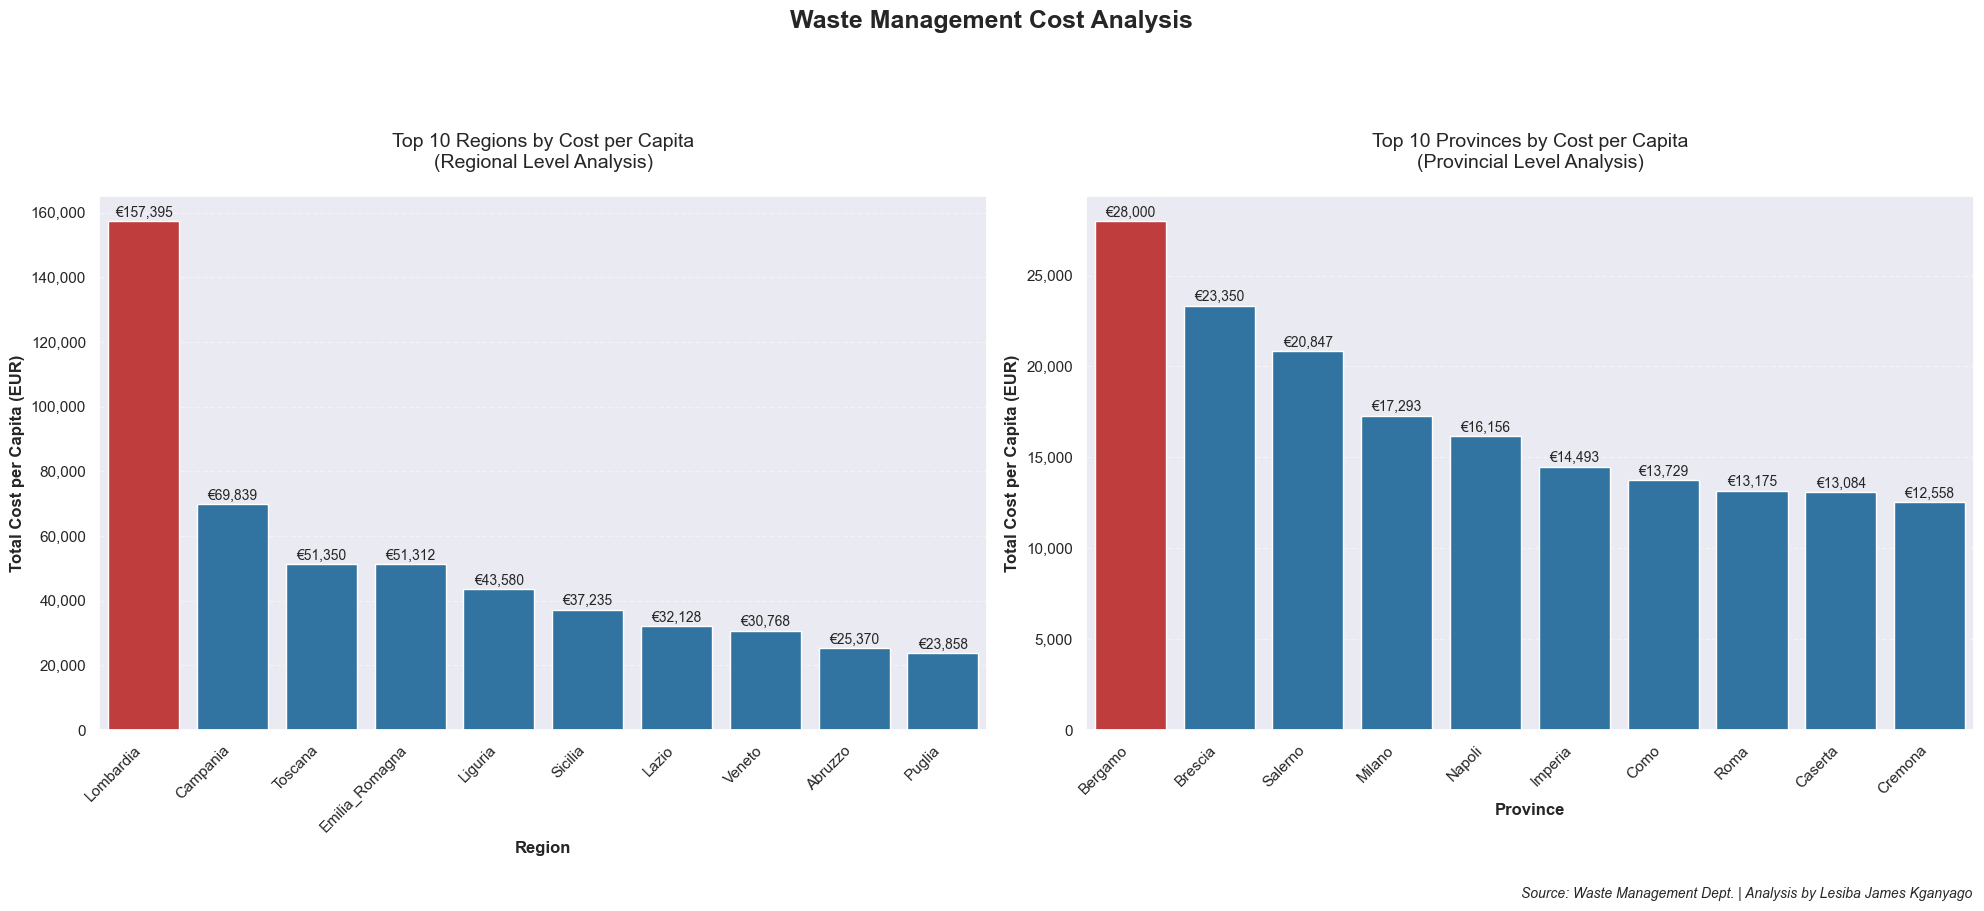

In [12]:

# Prepare figure
plt.figure(figsize=(20, 8))
plt.suptitle('Waste Management Cost Analysis', fontsize=18, y=1.08, fontweight='bold')

# ---------------------------
# Top 10 Regions by Cost
# ---------------------------
plt.subplot(1, 2, 1)
top10_tc_region = df.groupby('region')['tc'].sum().sort_values(ascending=False).head(10)
colors_region = ['#d62728' if i == 0 else '#1f77b4' for i in range(len(top10_tc_region))]
ax1 = sns.barplot(x=top10_tc_region.index, y=top10_tc_region.values, palette=colors_region)

ax1.set_title('Top 10 Regions by Cost per Capita\n(Regional Level Analysis)', fontsize=14, pad=20)
ax1.set_xlabel('Region', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Cost per Capita (EUR)', fontsize=12, fontweight='bold')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.4)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add € to bar labels
for p in ax1.patches:
    ax1.annotate(f"€{p.get_height():,.0f}", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 6), textcoords='offset points',
                 fontsize=10)

# ---------------------------
# Top 10 Provinces by Cost
# ---------------------------
plt.subplot(1, 2, 2)
top10_tc_province = df.groupby('province')['tc'].sum().sort_values(ascending=False).head(10)
colors_province = ['#d62728' if i == 0 else '#1f77b4' for i in range(len(top10_tc_province))]
ax2 = sns.barplot(x=top10_tc_province.index, y=top10_tc_province.values, palette=colors_province)

ax2.set_title('Top 10 Provinces by Cost per Capita\n(Provincial Level Analysis)', fontsize=14, pad=20)
ax2.set_xlabel('Province', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Cost per Capita (EUR)', fontsize=12, fontweight='bold')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.grid(axis='y', linestyle='--', alpha=0.4)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add € to bar labels
for p in ax2.patches:
    ax2.annotate(f"€{p.get_height():,.0f}", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 6), textcoords='offset points',
                 fontsize=10)
# Add Source
plt.figtext(0.99, -0.03, 'Source: Waste Management Dept. | Analysis by Lesiba James Kganyago',
            ha='right', fontsize=10, style='italic')

plt.tight_layout()
plt.show()


# 🌍 **Best Performers**

---

## 💶 <span style="font-size:1.2em; font-weight:bold;">Regional-Level Analysis</span>

From the **left chart**:

- 🏆 <span style="font-weight:bold; color:#2E86C1;">Lombardia</span> stands out with the **highest total cost per capita** for waste management, at <span style="color:#117A65; font-weight:bold;">157,395 EUR</span>, more than double the next region, <span style="font-weight:bold;">Campania</span> (<span style="color:#117A65;">69,839 EUR</span>).
- Other regions with significant costs per capita include:
    - **Toscana** (<span style="color:#117A65;">51,350 EUR</span>)
    - **Emilia-Romagna** (<span style="color:#117A65;">51,312 EUR</span>)
    - **Liguria** (<span style="color:#117A65;">43,580 EUR</span>)
- The top 10 is rounded out by **Sicilia, Lazio, Veneto, Abruzzo, and Puglia**, all with progressively lower costs.

> 🧭 This suggests that certain regions, particularly in the **North of Italy** (like Lombardia, Emilia-Romagna, and Toscana), face much higher per capita waste management costs. This may reflect:
>
> - ✨ **Higher service standards or operational costs**
> - ♻️ **More advanced or comprehensive waste management systems**
> - ⚠️ **Potential inefficiencies or unique local challenges**

---

## 🏢 <span style="font-size:1.2em; font-weight:bold;">Provincial-Level Analysis</span>

From the **right chart**:

- 🥇 **Bergamo** leads all provinces with the **highest cost per capita** (<span style="color:#CA6F1E; font-weight:bold;">28,000 EUR</span>), followed by **Brescia** (<span style="color:#CA6F1E;">23,350 EUR</span>) and **Milano** (<span style="color:#CA6F1E;">20,847 EUR</span>).
- Other high-cost provinces include: **Salerno, Napoli, Imperia, Como, Roma, Caserta, and Cremona**.

> 🏅 Notably, many top provinces are located within **Lombardia**, reinforcing the region’s overall high costs.

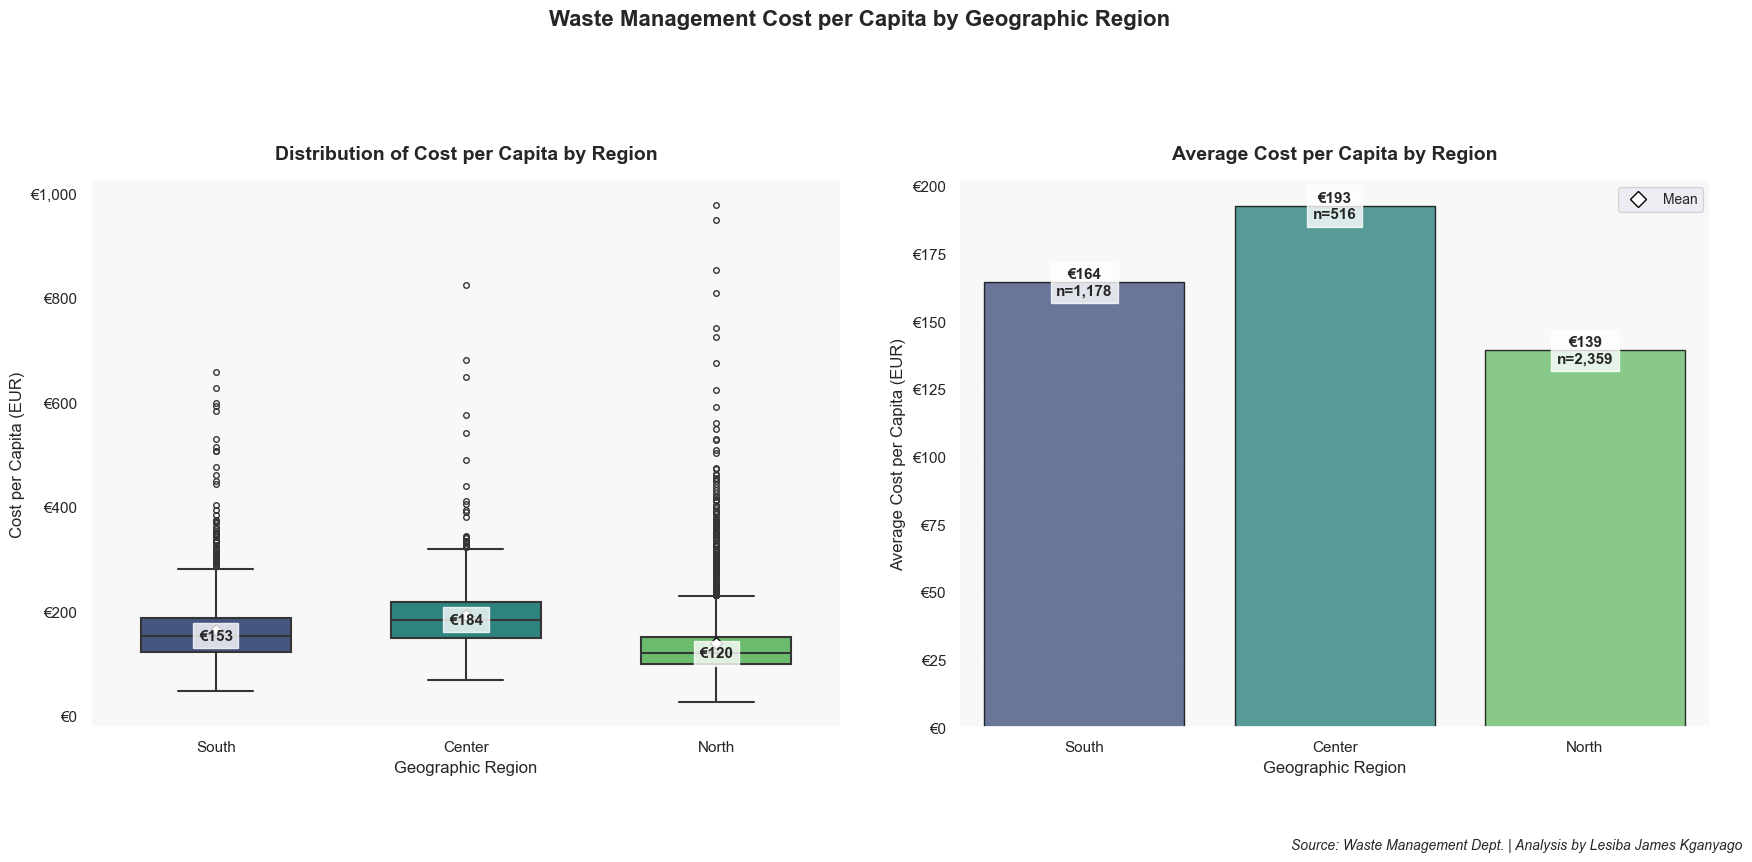

In [13]:

plt.figure(figsize=(18, 8))

# Create mapping for geo labels
geo_mapping = {1: 'South', 2: 'Center', 3: 'North'}
df['geo_label'] = df['geo'].map(geo_mapping)

# Calculate summary statistics for barplot
geo_stats = df.groupby('geo_label')['tc'].agg(['median', 'mean', 'count']).loc[['South', 'Center', 'North']]

# ----------------------------
# BOXPLOT (Left)
# ----------------------------
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(
    x='geo_label', y='tc', data=df, 
    order=['South', 'Center', 'North'],
    palette='viridis',
    width=0.6,
    linewidth=1.5,
    fliersize=4,
    showmeans=True,
    meanprops={
        "marker": "D",
        "markerfacecolor": "white",
        "markeredgecolor": "black",
        "markersize": 6
    })

# Formatting
plt.title('Distribution of Cost per Capita by Region', fontsize=14, pad=15, fontweight='bold')
plt.xlabel('Geographic Region', fontsize=12)
plt.ylabel('Cost per Capita (EUR)', fontsize=12)
plt.grid(axis='y', linestyle=':', alpha=0.4)
ax1.set_facecolor('#f8f8f8')

# Add euro to y-axis
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'€{int(x):,}'))

# Add median value annotations with €
for i, median in enumerate(geo_stats['median']):
    ax1.text(i, median, f'€{median:,.0f}', 
             ha='center', va='center',
             fontsize=11, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8))

# ----------------------------
# BARPLOT (Right)
# ----------------------------
plt.subplot(1, 2, 2)
ax2 = sns.barplot(
    x=geo_stats.index, y='mean', data=geo_stats,
    palette='viridis',
    edgecolor='black',
    linewidth=1,
    alpha=0.8)

# Formatting
plt.title('Average Cost per Capita by Region', fontsize=14, pad=15, fontweight='bold')
plt.xlabel('Geographic Region', fontsize=12)
plt.ylabel('Average Cost per Capita (EUR)', fontsize=12)
plt.grid(axis='y', linestyle=':', alpha=0.4)
ax2.set_facecolor('#f8f8f8')

# Add euro to y-axis
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'€{int(x):,}'))

# Value labels with € and sample count
for i, (mean, count) in enumerate(zip(geo_stats['mean'], geo_stats['count'])):
    ax2.text(i, mean, f'€{mean:,.0f}\nn={count:,}', 
             ha='center', va='center',
             fontsize=11, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8))

# ----------------------------
# Shared elements
# ----------------------------
plt.suptitle('Waste Management Cost per Capita by Geographic Region', 
             fontsize=16, y=1.02, fontweight='bold')

# Add legend for mean markers
mean_marker = plt.Line2D([], [], color='black', marker='D', linestyle='None',
                         markersize=8, label='Mean', markerfacecolor='white')
plt.legend(handles=[mean_marker], loc='upper right', fontsize=10)

# Add Source
plt.figtext(0.99, -0.03, 'Source: Waste Management Dept. | Analysis by Lesiba James Kganyago',
            ha='right', fontsize=10, style='italic')

plt.tight_layout(pad=3.0)
plt.show()


## 📊 Summary: Waste Management Cost by Region

This chart compares how much people pay for waste management in the South, Center, and North of the country.

- 🏛️ **Center**: Highest average cost per person (**€193**)
- 🌅 **South**: Middle range, average cost (**€164**)
- 🏔️ **North**: Lowest average cost (**€139**)

The North has the largest number of municipalities in the data, yet manages to keep costs lower.

---

### ✅ Key Takeaways & Recommendations

- 🔎 **Investigate high costs in the Center:** Explore if higher prices are due to inefficiencies, service standards, or other factors.
- 💡 **Learn from the North:** Their lower costs may reflect more efficient systems or better practices—consider adopting similar strategies in other regions.
- 🧩 **Tailor solutions by region:** Each area has unique needs; avoid a one-size-fits-all approach and customize waste management plans accordingly.



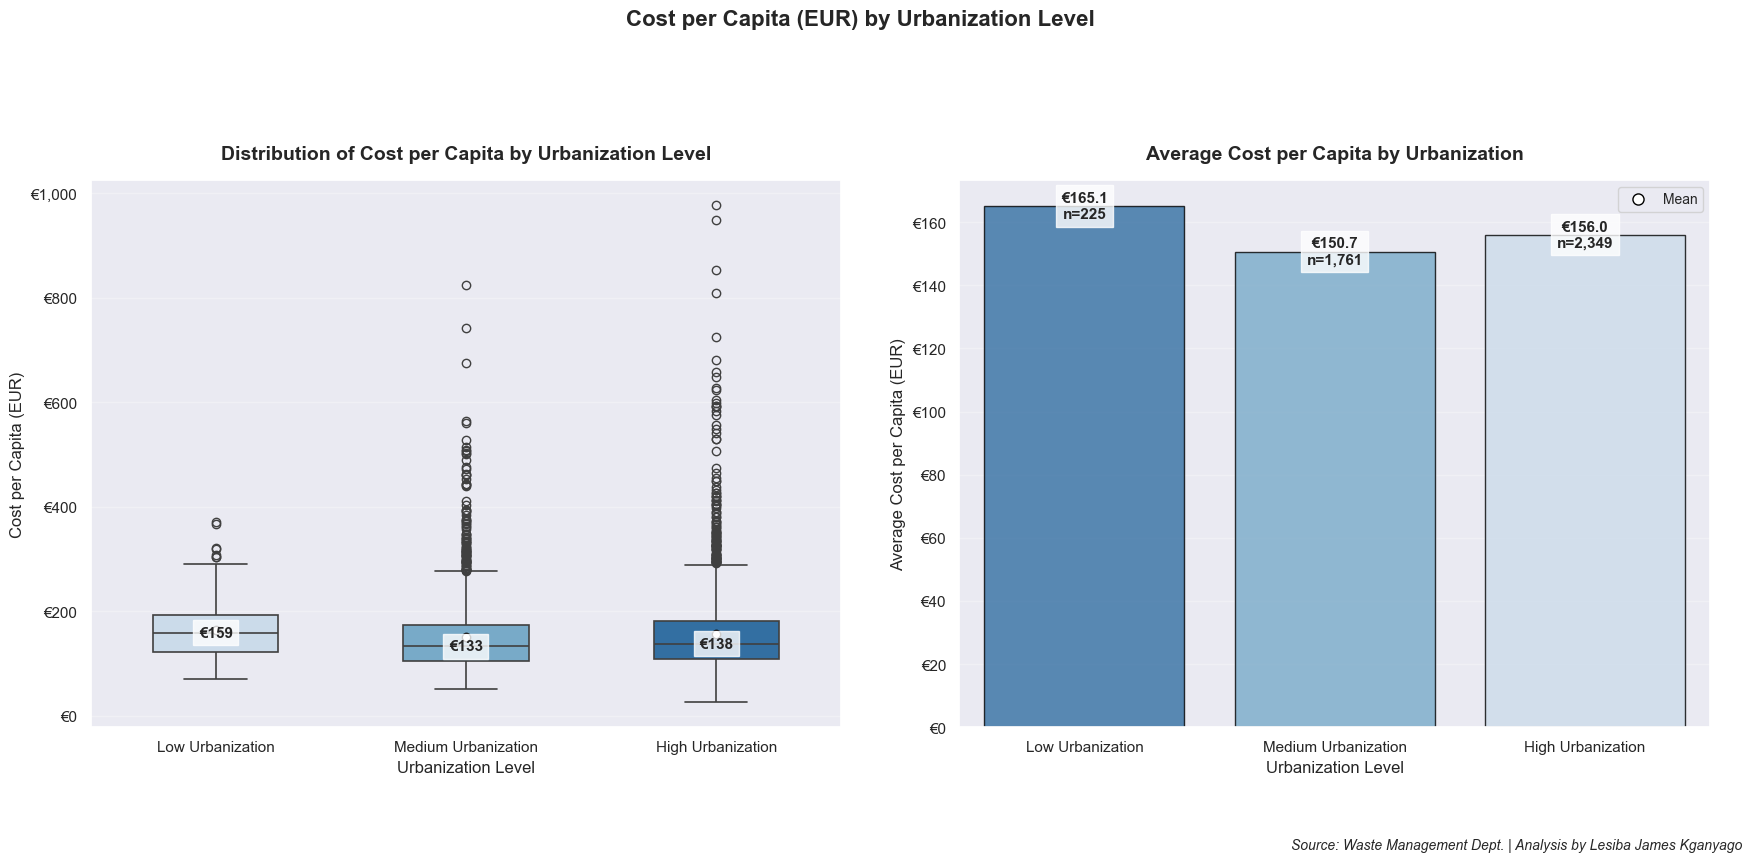

In [14]:
plt.figure(figsize=(18, 8))

# Create mapping and calculate stats
urban_mapping = {1: 'Low Urbanization', 2: 'Medium Urbanization', 3: 'High Urbanization'}
df['urban_label'] = df['urb'].map(urban_mapping)
urban_stats = df.groupby('urban_label')['tc'].agg(['median', 'mean', 'count'])
urban_stats = urban_stats.loc[['Low Urbanization', 'Medium Urbanization', 'High Urbanization']]

# BOXPLOT (Left)
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(x='urban_label', y='tc', data=df,
                 order=['Low Urbanization', 'Medium Urbanization', 'High Urbanization'],
                 palette='Blues',
                 width=0.5,
                 linewidth=1.2,
                 showmeans=True,
                 meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"6"})

plt.title('Distribution of Cost per Capita by Urbanization Level', fontsize=14, pad=15, fontweight='bold')
plt.xlabel('Urbanization Level', fontsize=12)
plt.ylabel('Cost per Capita (EUR)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'€{int(x):,}'))

# Add median annotations with euro symbol
for i, median in enumerate(urban_stats['median']):
    ax1.text(i, median, f'€{median:,.0f}', 
             ha='center', va='center', 
             fontweight='bold', fontsize=11,
             bbox=dict(facecolor='white', alpha=0.8))

# BARPLOT (Right) 
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=urban_stats.index, y='mean', data=urban_stats,
                 palette='Blues_r',  # Reversed palette for contrast
                 edgecolor='black',
                 linewidth=1,
                 alpha=0.8)

plt.title('Average Cost per Capita by Urbanization', fontsize=14, pad=15, fontweight='bold')
plt.xlabel('Urbanization Level', fontsize=12)
plt.ylabel('Average Cost per Capita (EUR)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'€{int(x):,}'))

# Add value labels and sample sizes with euro symbol
for i, (mean, count) in enumerate(zip(urban_stats['mean'], urban_stats['count'])):
    ax2.text(i, mean, f'€{mean:,.1f}\nn={count:,}', 
             ha='center', va='center',
             fontsize=11, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8))

# Shared elements
plt.suptitle('Cost per Capita (EUR) by Urbanization Level', 
             fontsize=16, y=1.02, fontweight='bold')

# Add legend for mean marker
mean_marker = plt.Line2D([], [], color='black', marker='o', linestyle='None',
                         markersize=8, label='Mean', markerfacecolor='white')
plt.legend(handles=[mean_marker], loc='upper right', fontsize=10)

# Add Source
plt.figtext(0.99, -0.03, 'Source: Waste Management Dept. | Analysis by Lesiba James Kganyago',
            ha='right', fontsize=10, style='italic')


plt.tight_layout(pad=3.0)
plt.show()

## 📊 Summary: Waste Cost by Urbanization Level

This chart shows how much people pay for waste services depending on whether they live in areas with different urbanization levels:

---

### 🗝️ Key Points

- 🏡 **Low Urbanization** has the **highest average cost**: **€165.1**
- 🏙️ **High Urbanization** is second: **€156.0**
- 🌆 **Medium Urbanization** is the **cheapest**: **€150.7**

---

### 🔎 But Notice:

- 👥 There are **more people** in high and medium urban areas.
- 🌾 In **rural (low urban)** areas, there are **fewer people**, but they **pay more**.

---

### ✅ Recommendations

- ❓ **Find out why rural areas pay more** – it could be due to transport costs or fewer services.
- 🤝 **Support rural areas** – they may need help to reduce their waste service costs.
- 🏙️ **Use city systems as a model** – urban areas manage many people for less cost per person.



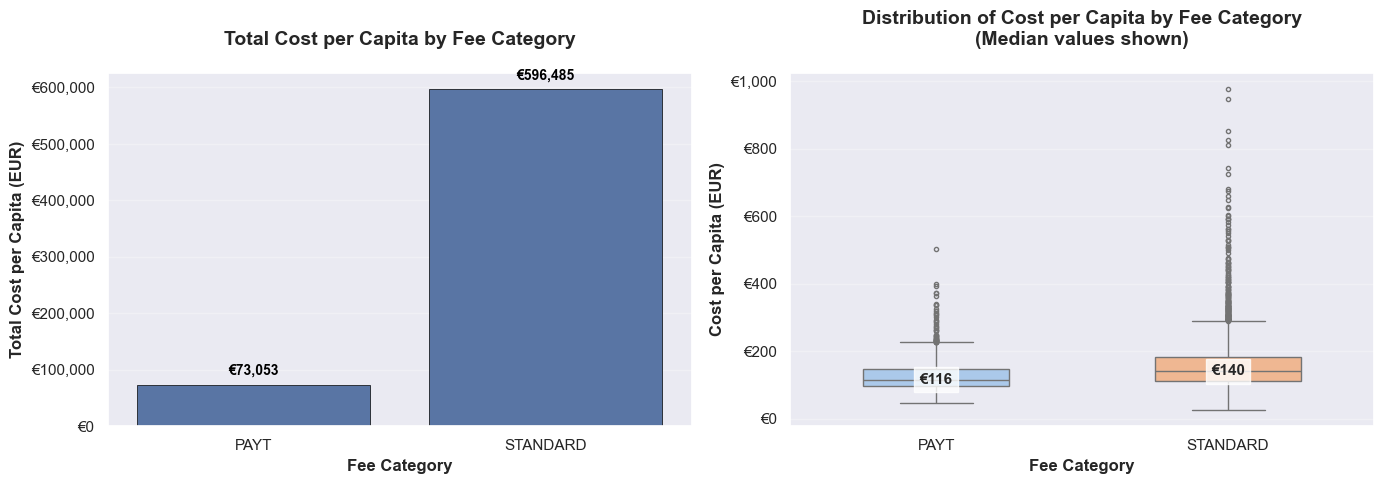

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Calculate median, mean, and count by fee category
fee_stats = df.groupby('fee')['tc'].agg(['median', 'mean', 'count'])

plt.figure(figsize=(14, 5))  # Double the width to accommodate both plots

# Create subplots - 1 row, 2 columns
ax1 = plt.subplot(1, 2, 1)  # Barplot
ax2 = plt.subplot(1, 2, 2)  # Boxplot

# Barplot (sum of tc by fee)
sns.barplot(x='fee', y='tc', data=df, 
            edgecolor='black', linewidth=0.5, 
            estimator=sum, ci=None, ax=ax1)

# Y-axis euro formatting
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'€{int(x):,}'))

# Formatting the barplot
ax1.set_title('Total Cost per Capita by Fee Category', 
              fontsize=14, pad=20, fontweight='bold')
ax1.set_xlabel('Fee Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Cost per Capita (EUR)', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add euro-labeled bar labels
for container in ax1.containers:
    ax1.bar_label(container, 
                  fmt=lambda x: f'€{x:,.0f}', 
                  label_type='edge', 
                  fontsize=10, 
                  padding=5,
                  color='black',
                  fontweight='bold')

# Boxplot
sns.boxplot(x='fee', y='tc', data=df, 
            width=0.5, 
            palette='pastel',
            linewidth=1,
            fliersize=3,
            ax=ax2)

# Y-axis euro formatting
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'€{int(x):,}'))

# Add euro-labeled median annotations
for i, median in enumerate(fee_stats['median']):
    ax2.text(i, median, f'€{median:,.0f}',
             ha='center', va='center',
             fontweight='bold', fontsize=11,
             bbox=dict(facecolor='white', alpha=0.8))

# Formatting the boxplot
ax2.set_title('Distribution of Cost per Capita by Fee Category\n(Median values shown)', 
              fontsize=14, pad=20, fontweight='bold')
ax2.set_xlabel('Fee Category', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cost per Capita (EUR)', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()


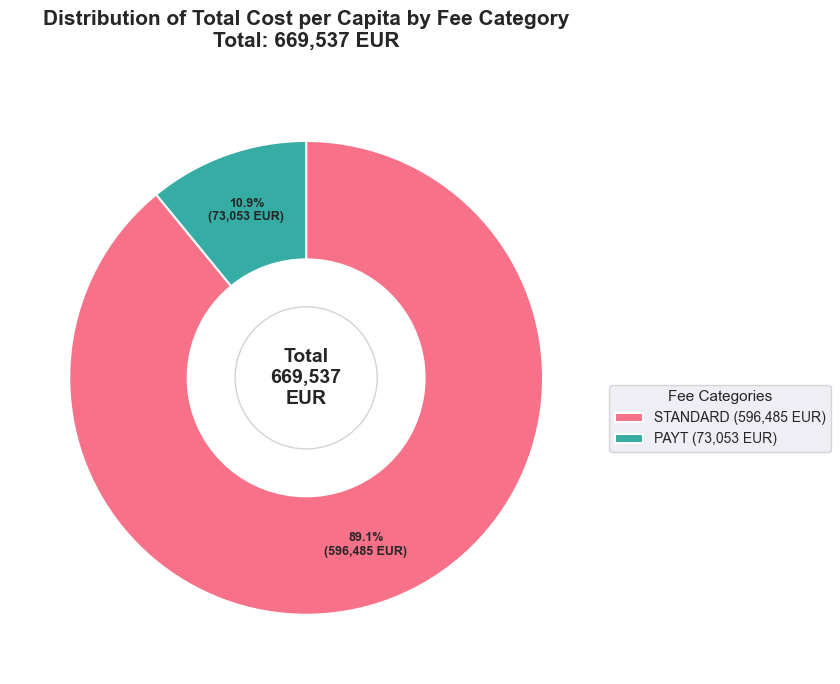

In [16]:
plt.figure(figsize=(10, 7))

# Prepare data
fee_counts = df.groupby('fee')['tc'].sum().sort_values(ascending=False)

# Create donut chart
wedges, texts, autotexts = plt.pie(
    fee_counts,
    labels=None,  # We'll use legend instead for cleaner look
    autopct=lambda p: f'{p:.1f}%\n({p*sum(fee_counts)/100:,.0f} EUR)',
    startangle=90,
    counterclock=False,
    wedgeprops=dict(width=0.5, edgecolor='white', linewidth=1.5),
    colors=sns.color_palette('husl', n_colors=len(fee_counts)),
    textprops={'fontsize': 9, 'fontweight': 'bold'},
    pctdistance=0.75
)

# Draw center circle to create donut effect
center_circle = plt.Circle((0, 0), 0.3, fc='white', edgecolor='lightgray')
plt.gca().add_artist(center_circle)

# Add title with total cost context
plt.title(f'Distribution of Total Cost per Capita by Fee Category\nTotal: {fee_counts.sum():,.0f} EUR', 
          fontsize=15, pad=25, fontweight='bold')

# Create enhanced legend with absolute values
legend_labels = [f'{label} ({value:,.0f} EUR)' for label, value in zip(fee_counts.index, fee_counts)]
plt.legend(wedges, legend_labels,
          title='Fee Categories',
          loc='upper left',
          bbox_to_anchor=(1, 0.5),
          fontsize=10,
          title_fontsize=11)

# Add center annotation
plt.text(0, 0, f"Total\n{fee_counts.sum():,.0f}\nEUR", 
         ha='center', va='center', 
         fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 📌 3. Policy Recommendations

Based on current findings, consider these actions:

- **Expand PAYT to more municipalities** — it's already showing strong results.
- **Run public awareness campaigns** highlighting cost and environmental benefits.
- **Replace flat fees for high waste producers** to encourage fairer, volume-based pricing.

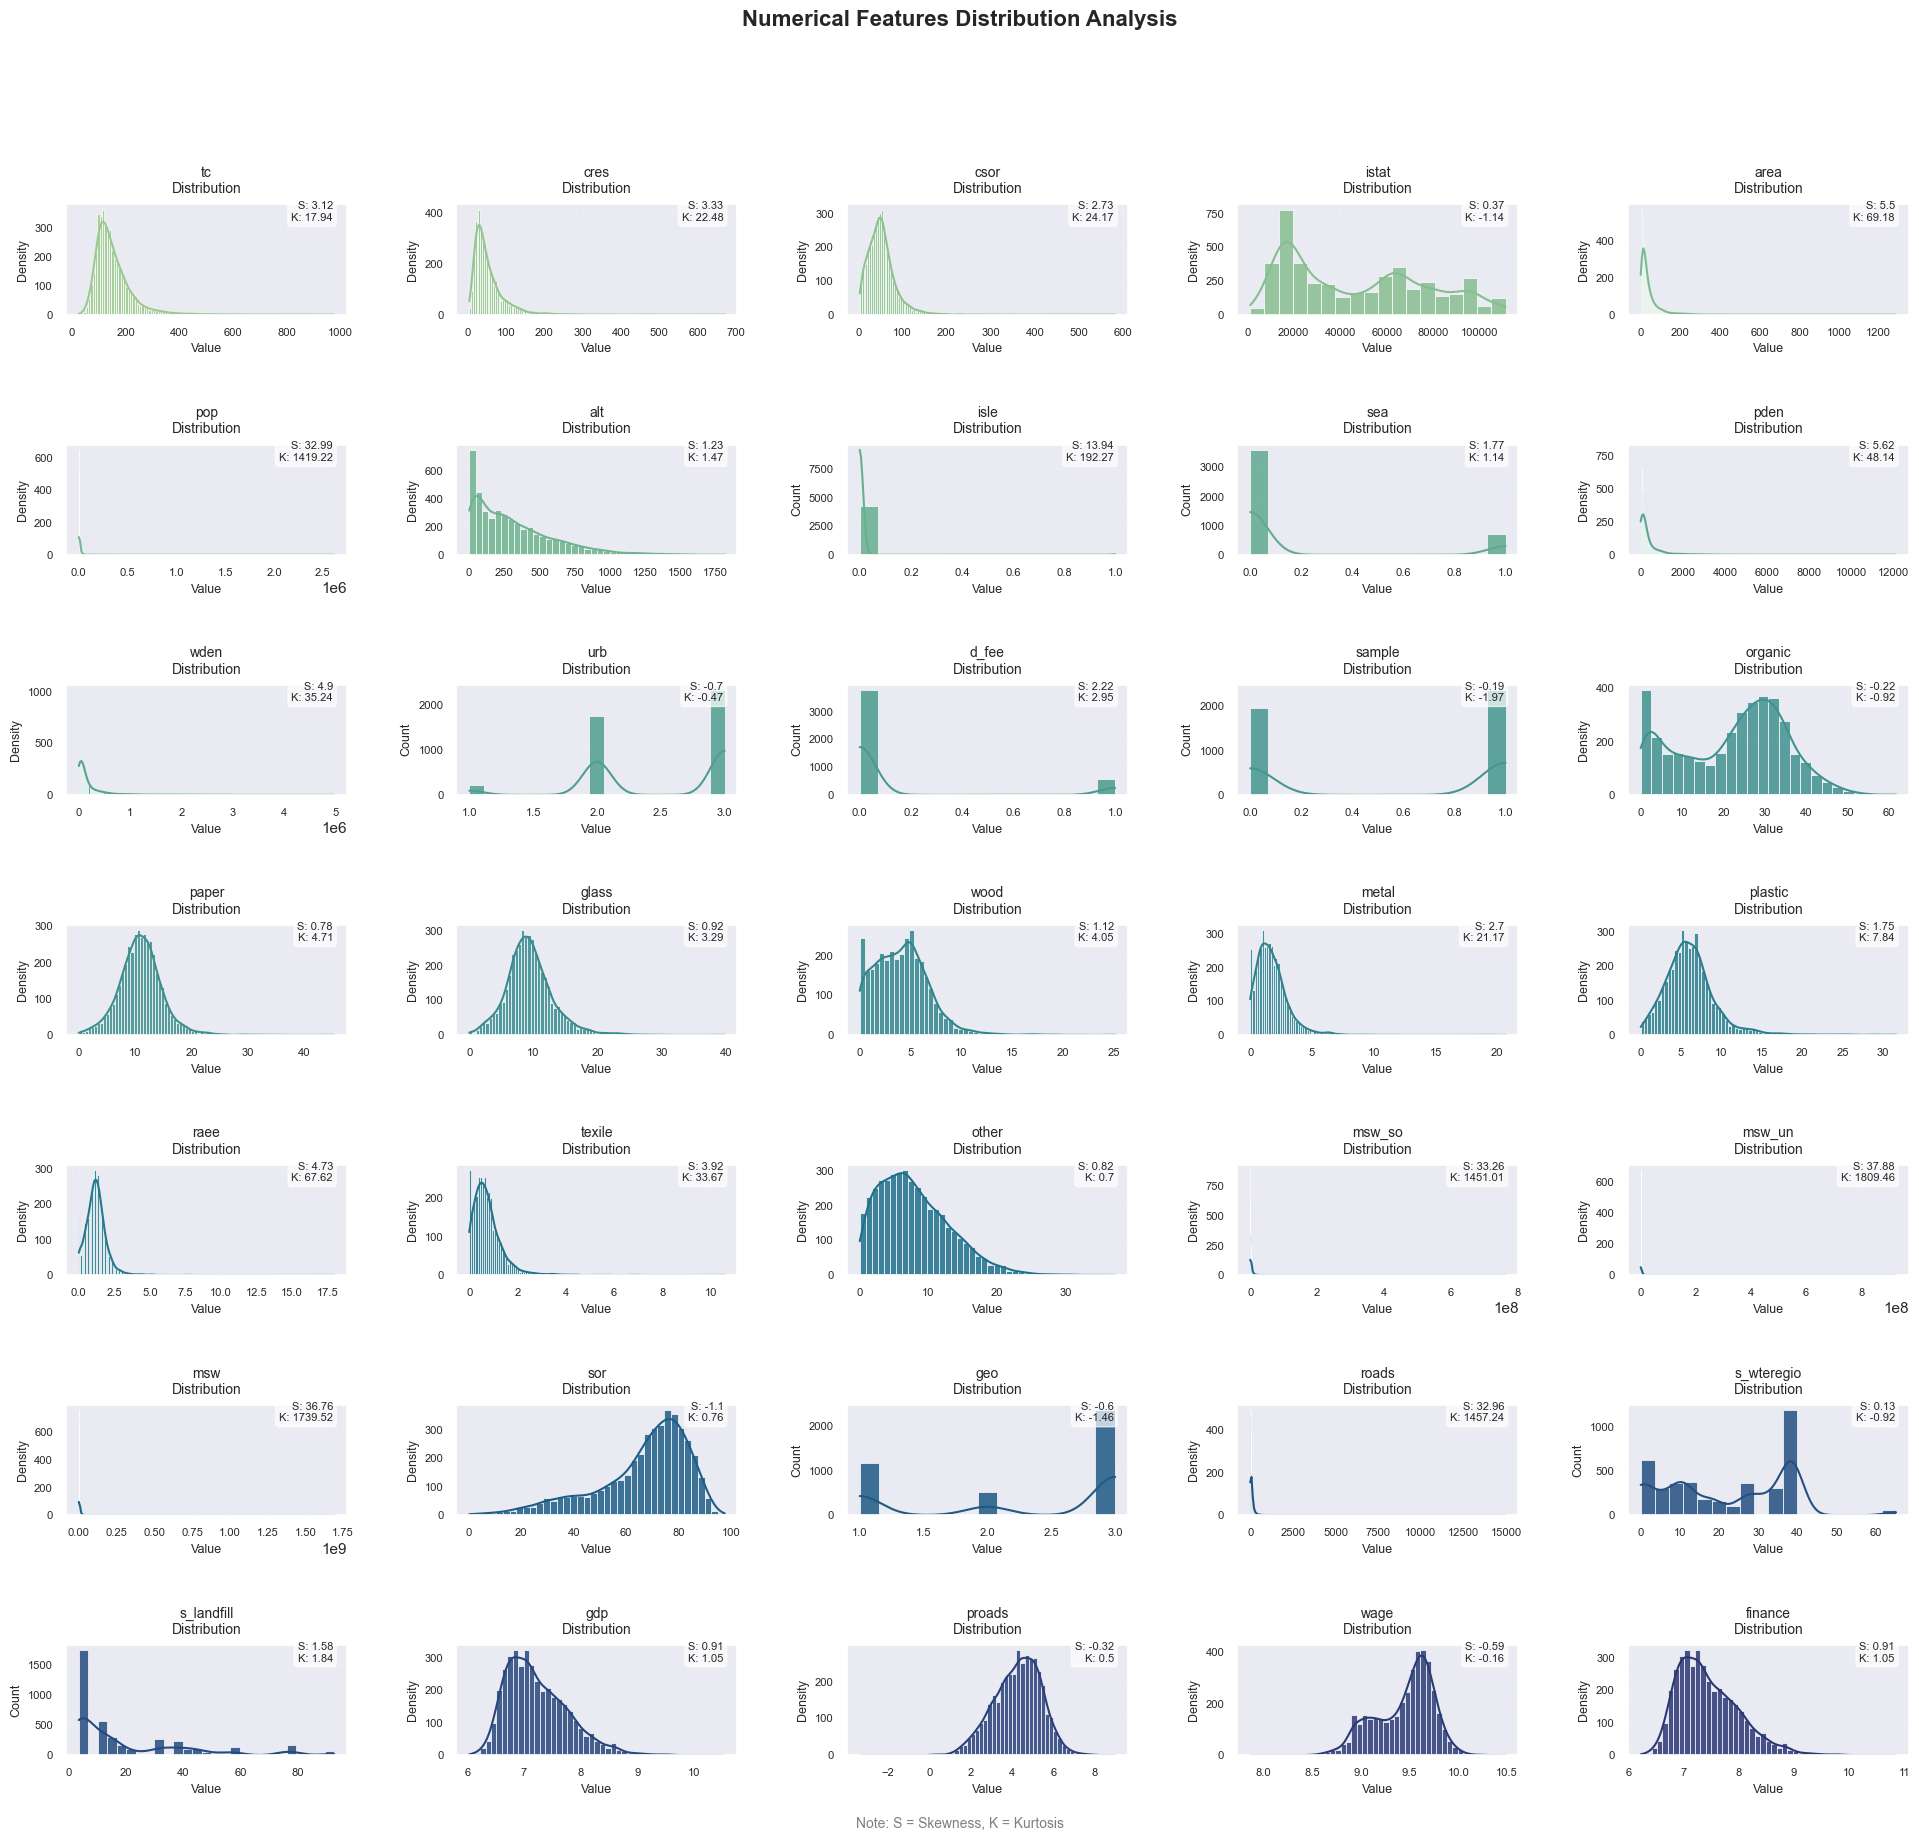

In [17]:
plt.figure(figsize=(20, 18))
plt.suptitle('Numerical Features Distribution Analysis', fontsize=16, y=1.02, fontweight='bold')

# Create a color gradient based on position
colors = sns.color_palette("crest", n_colors=len(num_cols.columns))

for i, col in enumerate(num_cols.columns):
    plt.subplot(7, 5, i + 1)
    
    # Enhanced histogram with adaptive bins
    sns.histplot(num_cols[col], 
                kde=True, 
                color=colors[i],
                bins='auto',  # Automatically determine optimal bin size
                edgecolor='white',
                linewidth=0.5,
                alpha=0.85)
    
    # Improved titles and labels
    plt.title(f'{col}\nDistribution', fontsize=10, pad=8)
    plt.xlabel('Value', fontsize=9)
    plt.ylabel('Density' if num_cols[col].nunique() > 25 else 'Count', fontsize=9)
    
    # Enhanced grid and styling
    plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.5)
    
    # Add skewness/kurtosis annotation
    skew_val = num_cols[col].skew().round(2)
    kurt_val = num_cols[col].kurtosis().round(2)
    plt.annotate(f'S: {skew_val}\nK: {kurt_val}',
                xy=(0.95, 0.85),
                xycoords='axes fraction',
                fontsize=8,
                ha='right',
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))
    
    # Adjust x-axis for better visibility
    plt.tick_params(axis='both', which='major', labelsize=8)

# Adjust layout and add footer
plt.tight_layout(pad=3.0)
plt.figtext(0.5, 0.01, 
           "Note: S = Skewness, K = Kurtosis", 
           ha="center", fontsize=10, color='gray')
plt.show()

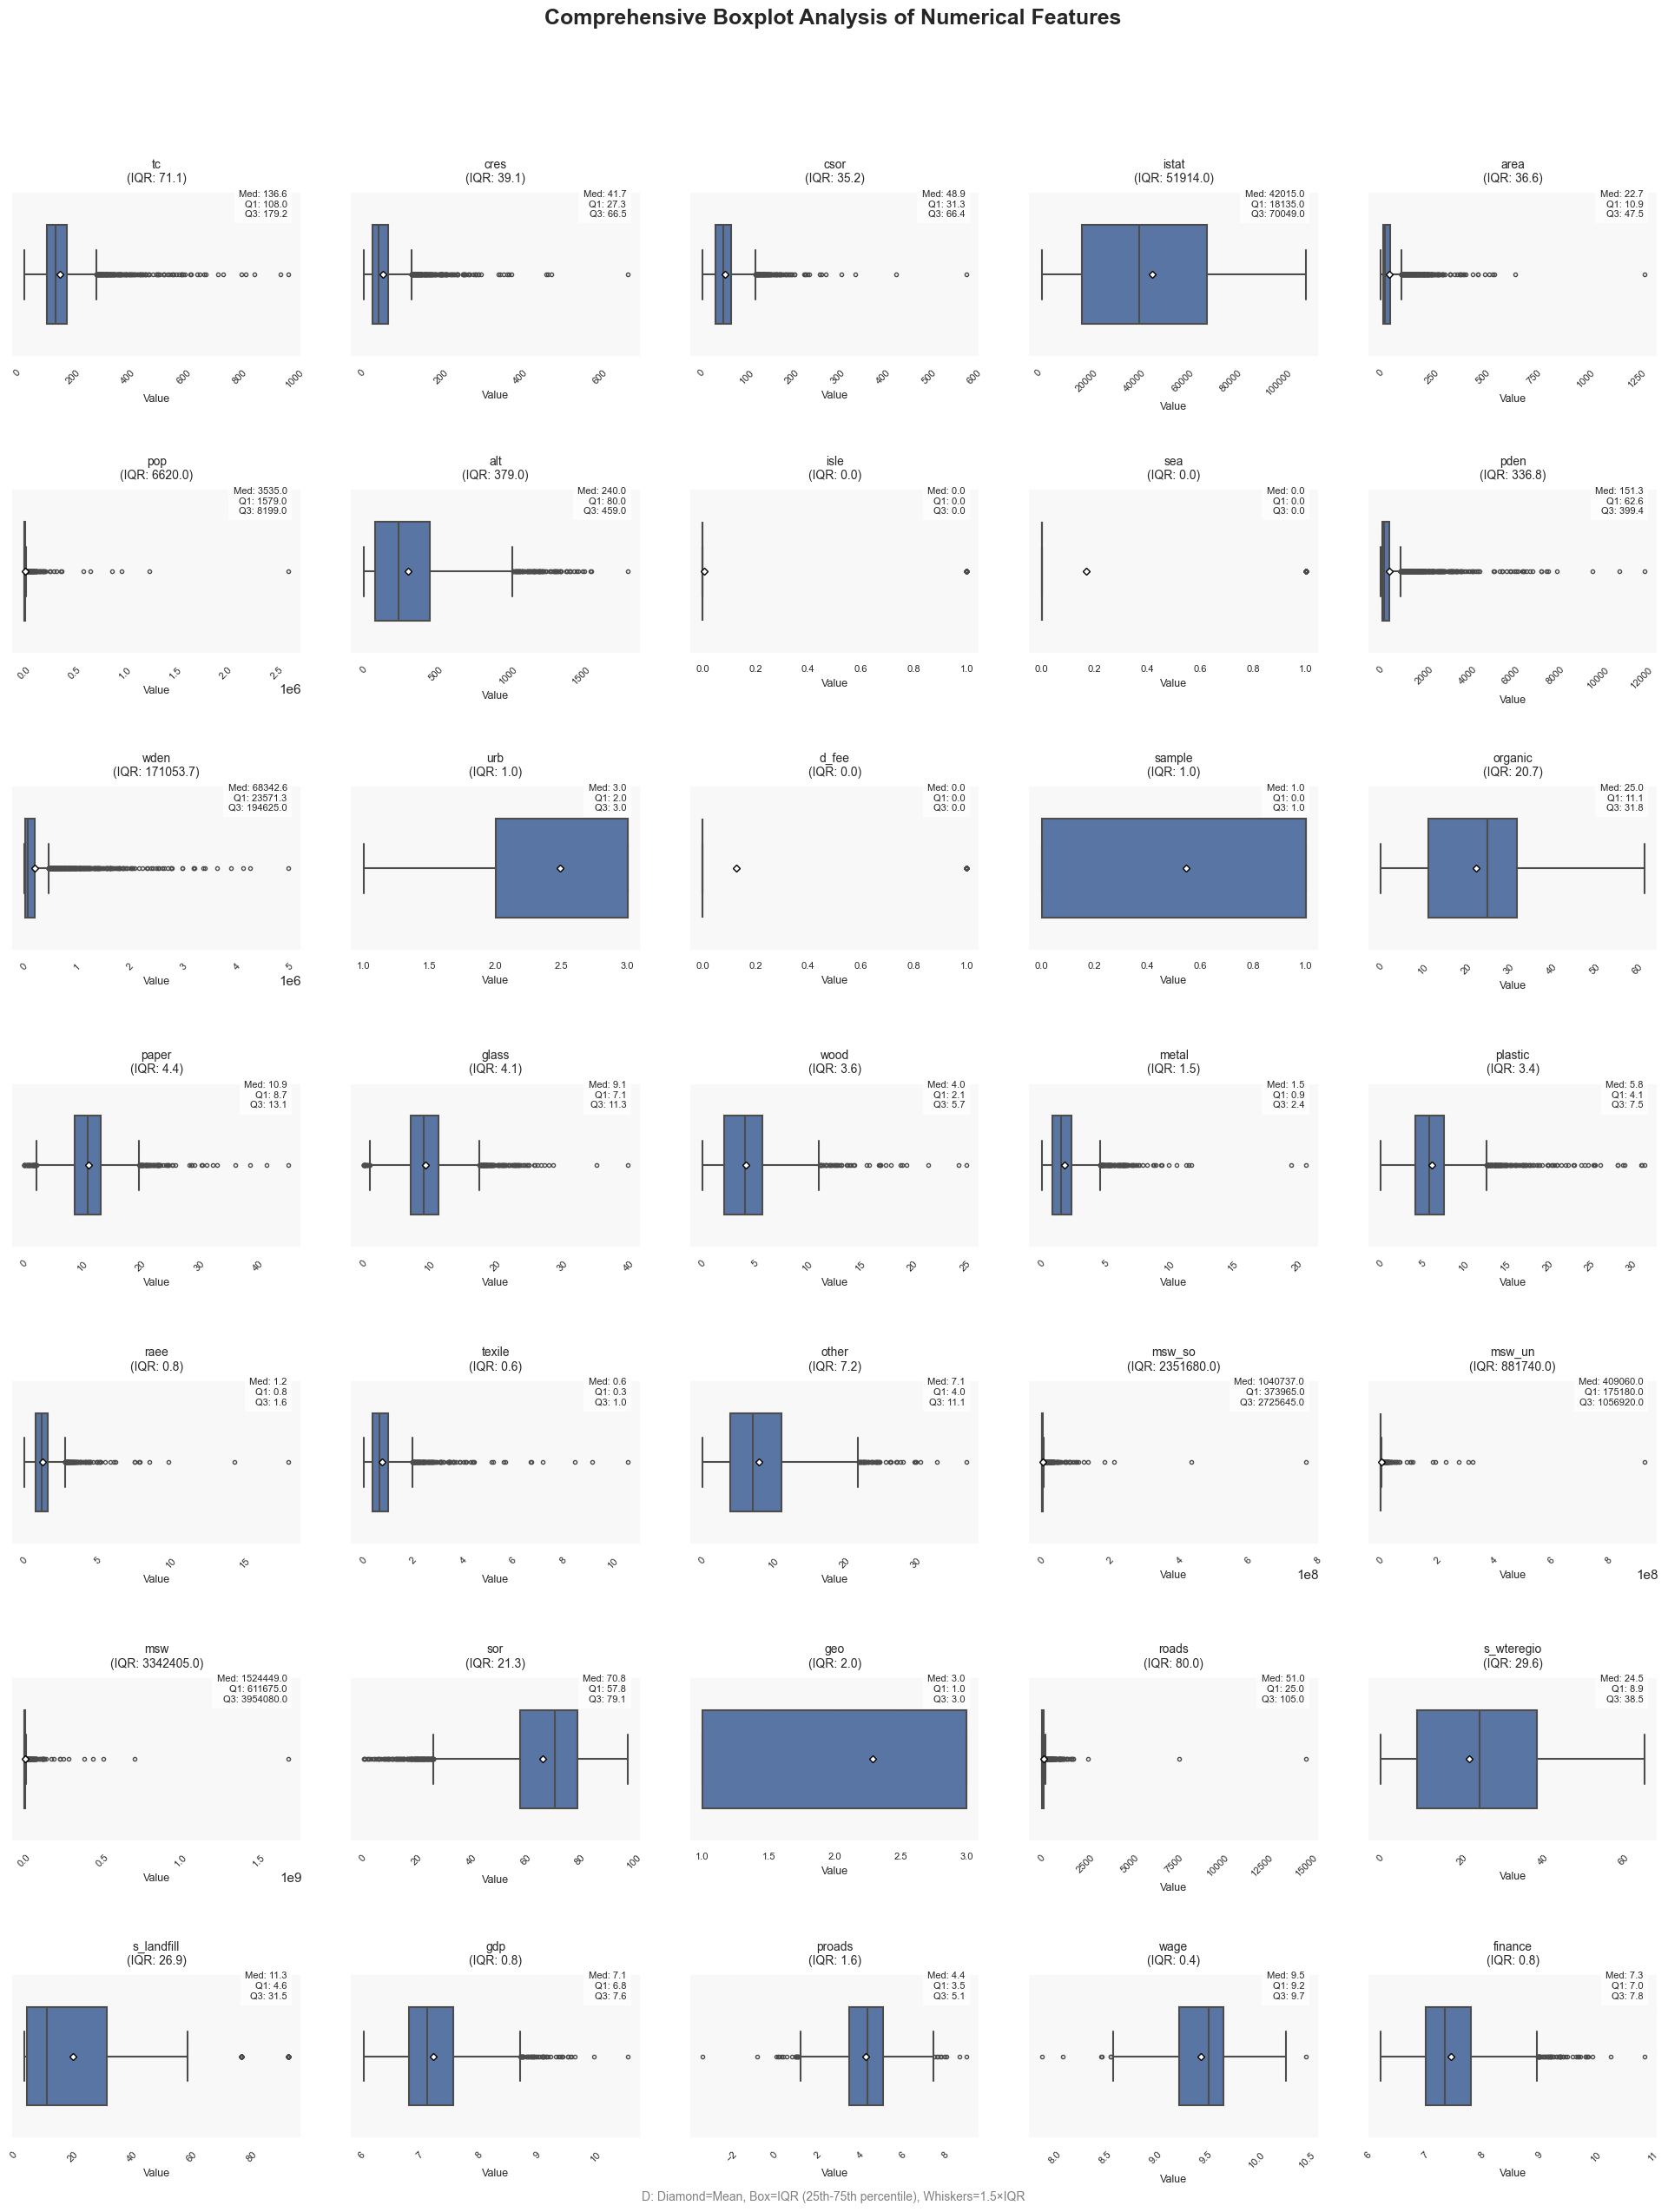

In [18]:
plt.figure(figsize=(20, 25))
plt.suptitle('Comprehensive Boxplot Analysis of Numerical Features', 
             fontsize=18, y=1.02, fontweight='bold')


for i, col in enumerate(num_cols.columns):
    plt.subplot(7, 5, i + 1)
    
    # Enhanced boxplot with custom styling
    box = sns.boxplot(x=num_cols[col], 
                     width=0.6,
                     linewidth=1.5,
                     fliersize=3,
                     showmeans=True,
                     meanprops={"marker":"D",
                               "markerfacecolor":"white",
                               "markeredgecolor":"black",
                               "markersize":4})
    
    # Improved titles and labels
    plt.title(f'{col}\n(IQR: {num_cols[col].quantile(0.75)-num_cols[col].quantile(0.25):.1f})', 
              fontsize=10, pad=8)
    plt.xlabel('Value', fontsize=9)
    plt.ylabel('')  # Remove redundant y-label
    
    # Add grid and background
    plt.grid(axis='x', linestyle=':', linewidth=0.5, alpha=0.5)
    plt.gca().set_facecolor('#f8f8f8')
    
    # Add important value annotations
    median = num_cols[col].median()
    q1 = num_cols[col].quantile(0.25)
    q3 = num_cols[col].quantile(0.75)
    
    plt.text(0.95, 0.85, 
             f'Med: {median:.1f}\nQ1: {q1:.1f}\nQ3: {q3:.1f}',
             transform=plt.gca().transAxes,
             fontsize=8,
             ha='right',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    # Rotate x-tick labels if needed
    if len(num_cols[col].unique()) > 10:
        plt.xticks(rotation=45, fontsize=8)
    else:
        plt.xticks(fontsize=8)

# Adjust layout and add footer
plt.tight_layout(pad=3.0)
plt.figtext(0.5, 0.01, 
           
           "D: Diamond=Mean, Box=IQR (25th-75th percentile), Whiskers=1.5×IQR",
           ha="center", fontsize=10, color='gray')
plt.show()

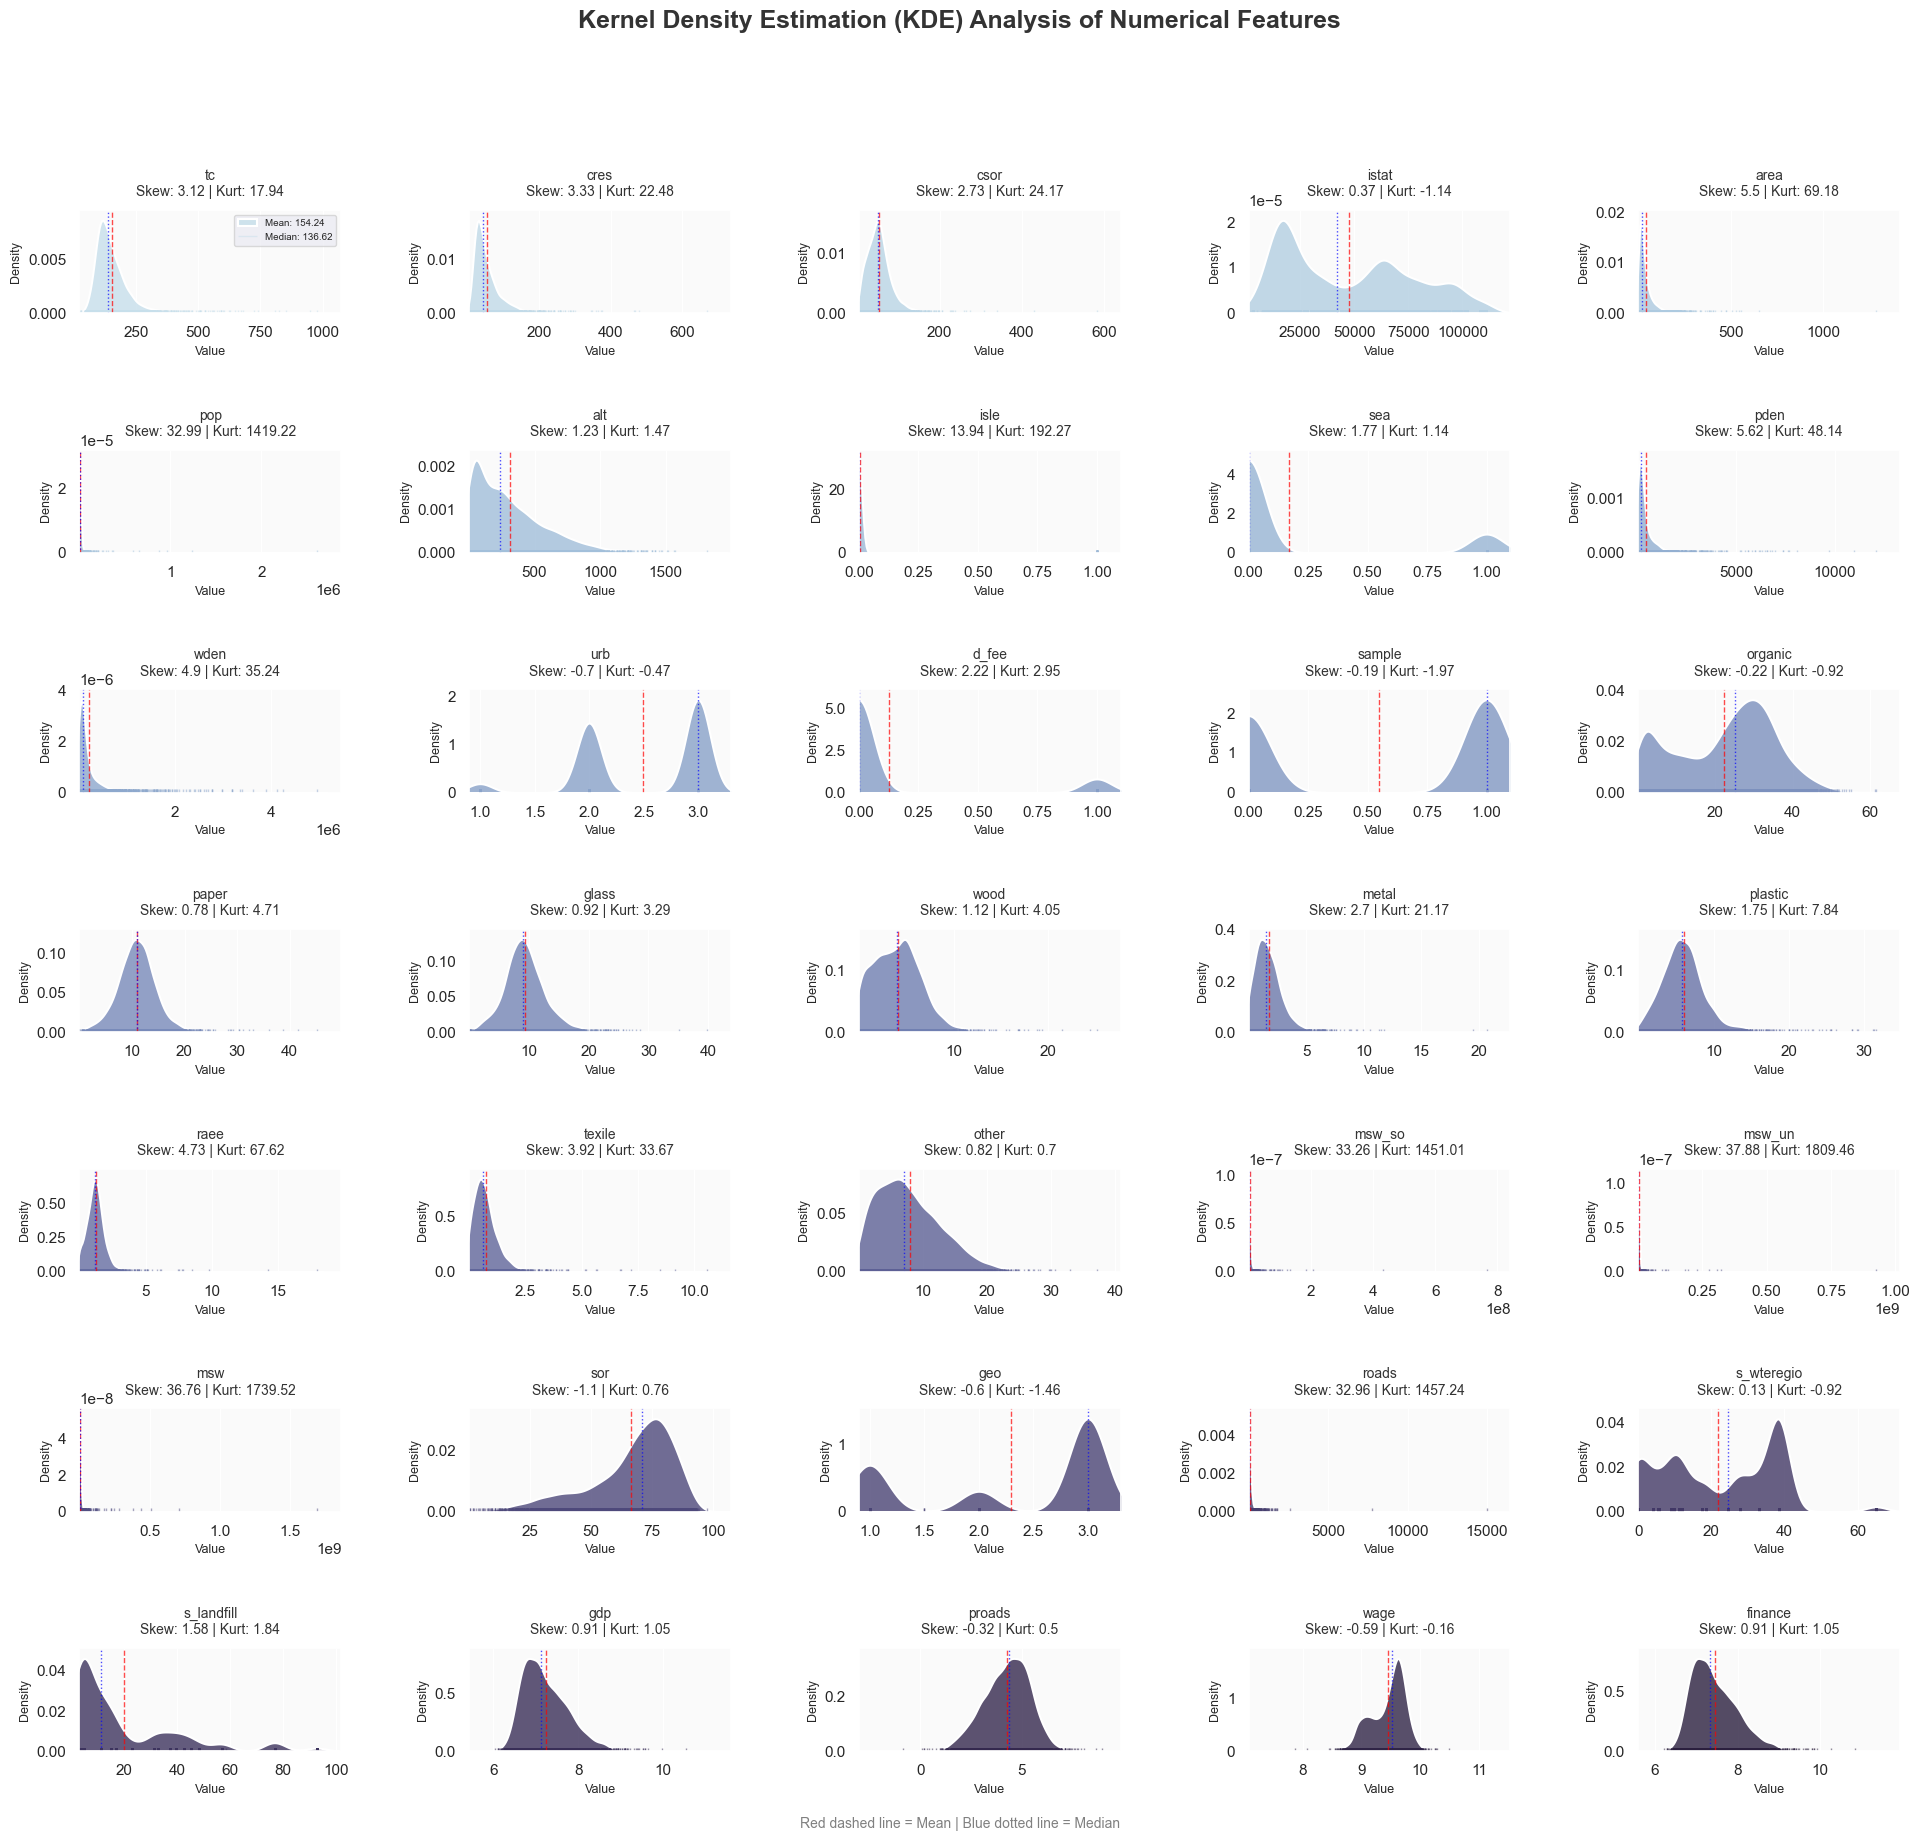

In [19]:
plt.figure(figsize=(20, 18))
plt.suptitle('Kernel Density Estimation (KDE) Analysis of Numerical Features', 
             fontsize=18, y=1.02, fontweight='bold', color='#333333')

# Create a color gradient that progresses through the grid
colors = sns.color_palette("ch:s=.25,rot=-.25", n_colors=len(num_cols.columns))

for i, col in enumerate(num_cols.columns):
    plt.subplot(7, 5, i + 1)
    
    # Enhanced KDE plot with custom styling
    kde = sns.kdeplot(x=num_cols[col], 
                     fill=True,
                     color=colors[i],
                     alpha=0.8,
                     linewidth=1.5,
                     edgecolor='white',
                     common_norm=False)
    
    # Add rug plot for actual data points
    sns.rugplot(x=num_cols[col], color=colors[i], height=0.03, alpha=0.5)
    
    # Improved titles with statistical measures
    skewness = num_cols[col].skew().round(2)
    kurtosis = num_cols[col].kurtosis().round(2)
    plt.title(f'{col}\nSkew: {skewness} | Kurt: {kurtosis}', 
              fontsize=10, pad=10, color='#333333')
    
    # Axis labels
    plt.xlabel('Value', fontsize=9)
    plt.ylabel('Density', fontsize=9)
    
    # Add grid and background
    plt.grid(axis='y', linestyle=':', linewidth=0.5, alpha=0.3)
    plt.gca().set_facecolor('#fafafa')
    
    # Add vertical lines for mean and median
    mean_val = num_cols[col].mean()
    median_val = num_cols[col].median()
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1, alpha=0.7)
    plt.axvline(median_val, color='blue', linestyle=':', linewidth=1, alpha=0.7)
    
    # Add legend for mean/median
    if i == 0:  # Only add legend to first plot for clarity
        plt.legend([f'Mean: {mean_val:.2f}', f'Median: {median_val:.2f}'], 
                  fontsize=7, framealpha=0.7)
    
    # Adjust x-axis limits to remove white space
    plt.xlim(left=num_cols[col].min() * 0.9, right=num_cols[col].max() * 1.1)

# Adjust layout and add footer
plt.tight_layout(pad=3.0)
plt.figtext(0.5, 0.01, 
           
           "Red dashed line = Mean | Blue dotted line = Median",
           ha="center", fontsize=10, color='gray')
plt.show()

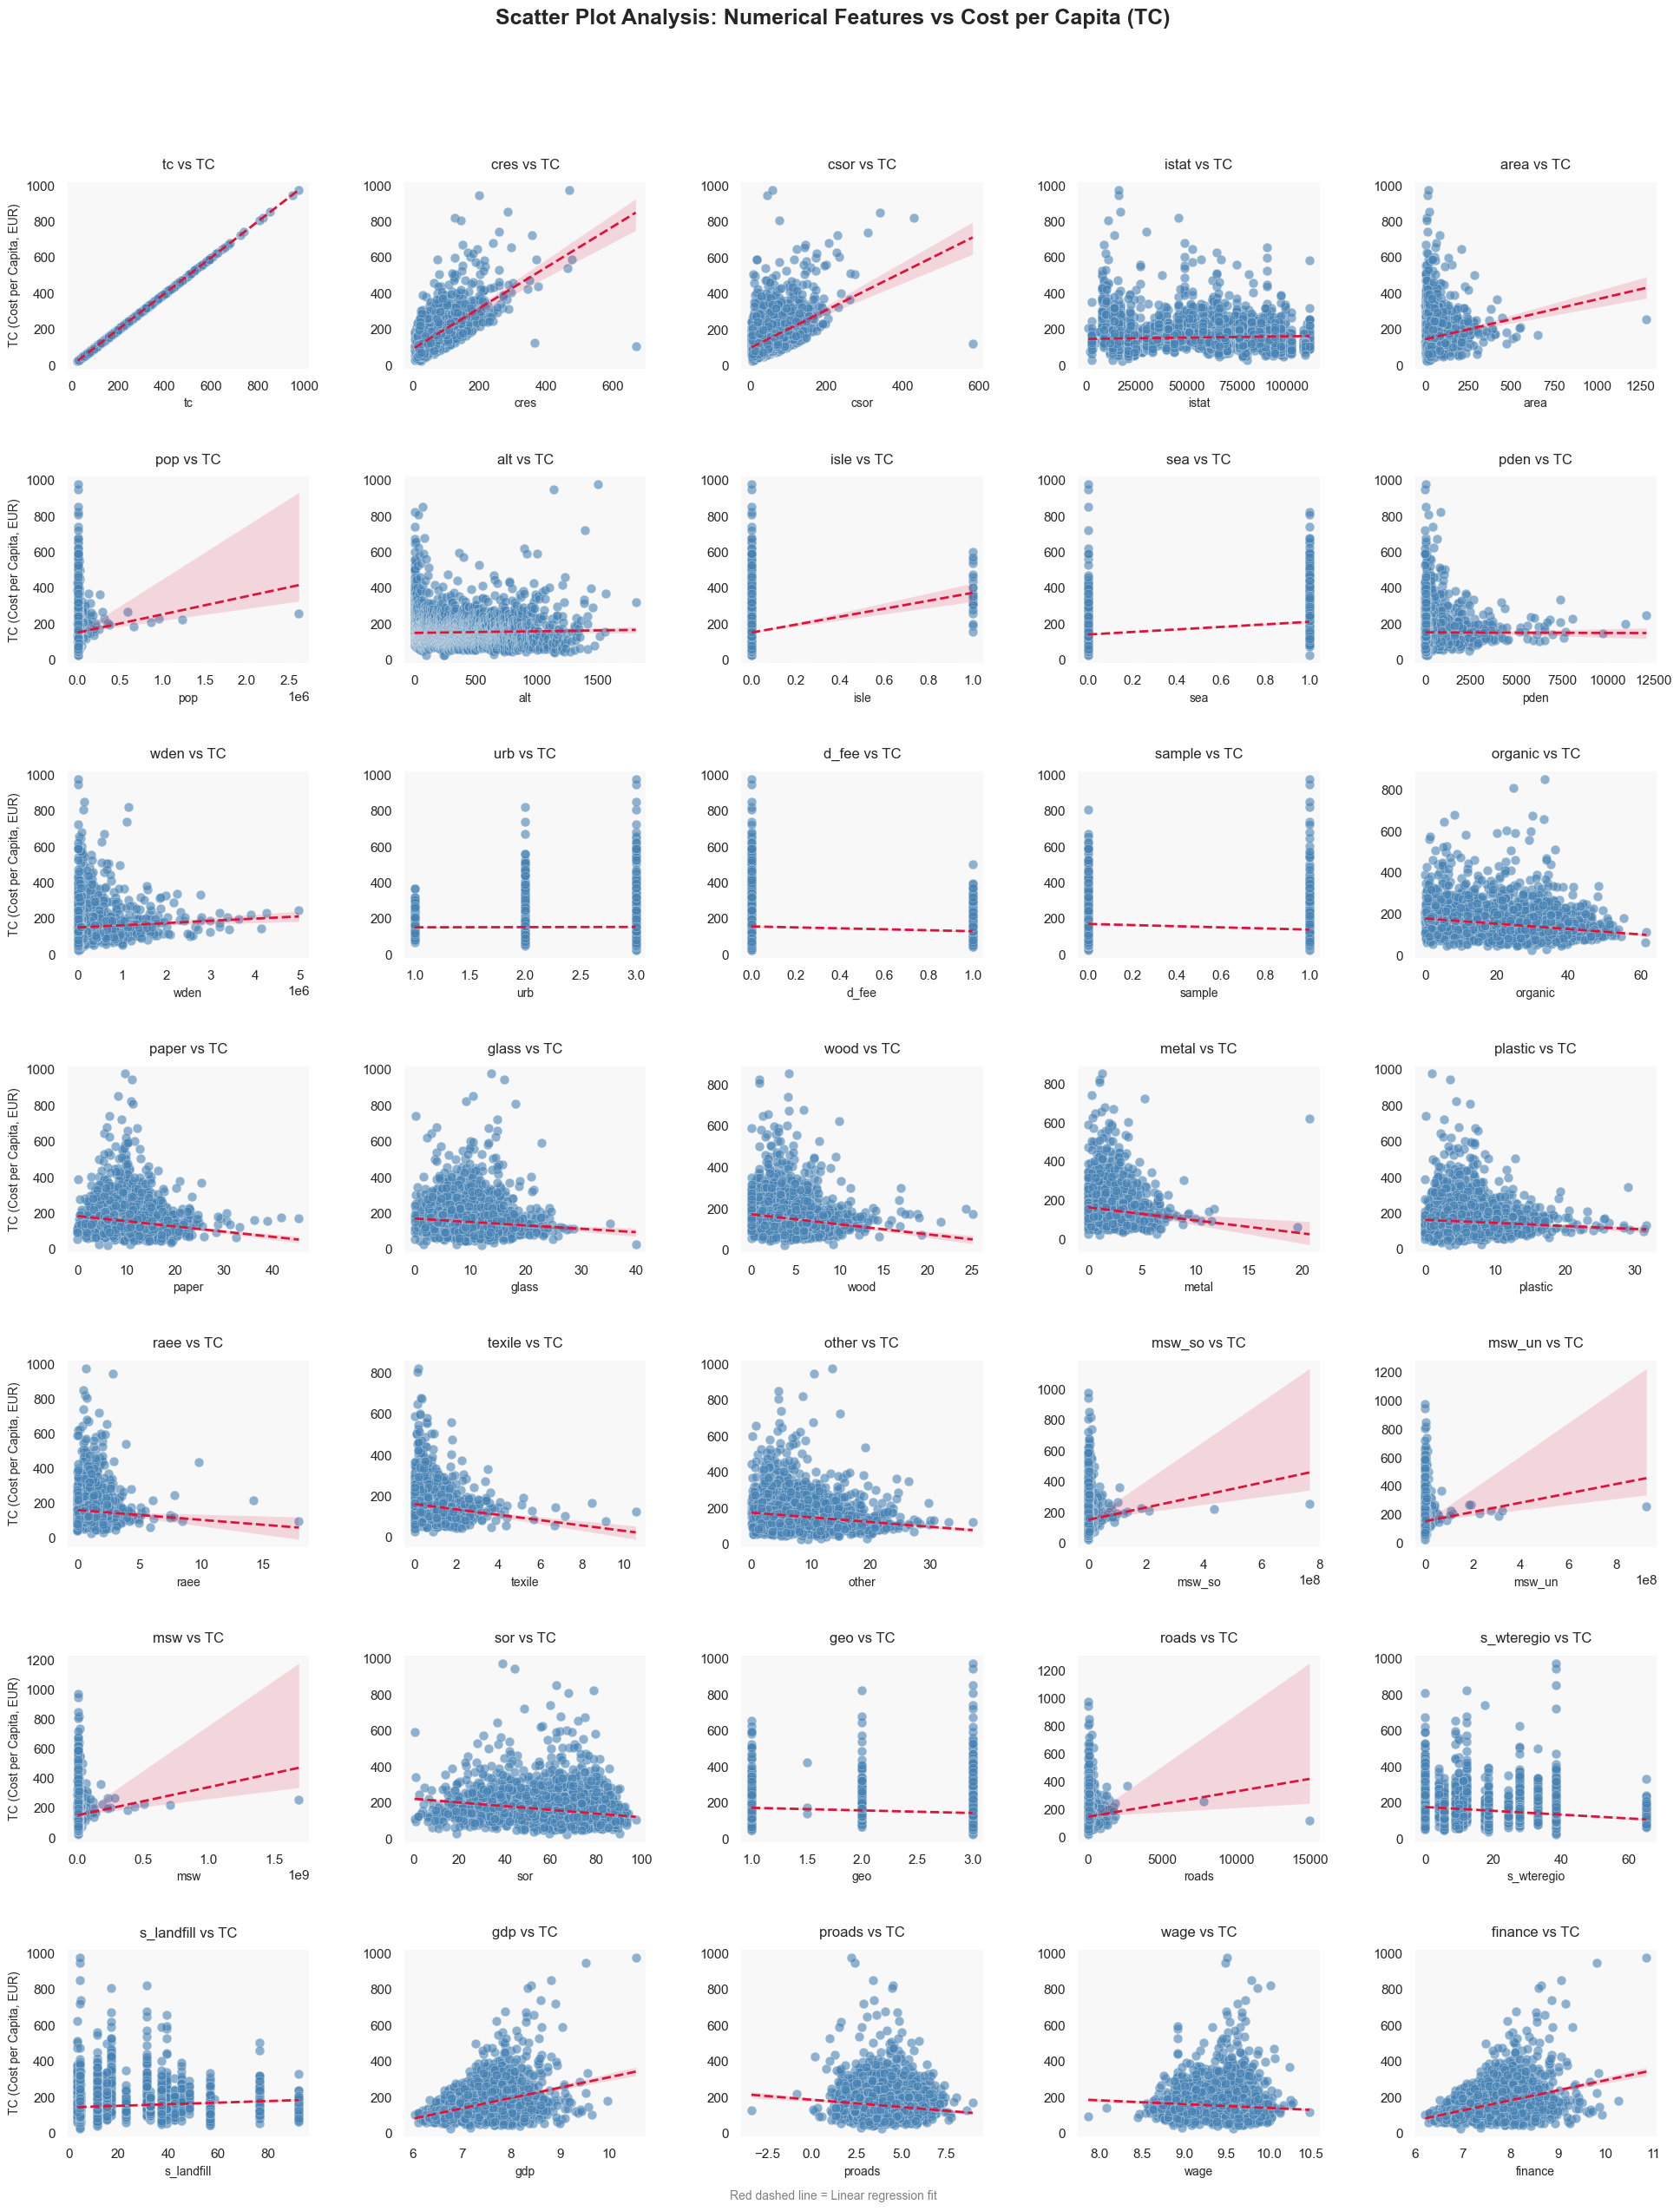

In [20]:
plt.figure(figsize=(20, 25))
plt.suptitle('Scatter Plot Analysis: Numerical Features vs Cost per Capita (TC)', 
             fontsize=18, y=1.02, fontweight='bold')

for i, col in enumerate(num_cols):
    plt.subplot(7, 5, i + 1)
    
    # Clean scatter plot without hue
    scatter = sns.scatterplot(
        x=df[col], 
        y=df['tc'], 
        color='steelblue',  # Single color
        alpha=0.6,
        s=60,
        edgecolor='white',
        linewidth=0.3
    )
    
    # Regression line with enhanced visibility
    sns.regplot(
        x=df[col], 
        y=df['tc'], 
        scatter=False, 
        color='crimson', 
        line_kws={'linewidth': 2, 'linestyle': '--'}
    )
    
    # Formatting
    plt.title(f'{col} vs TC', fontsize=12, pad=10)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('TC (Cost per Capita, EUR)' if i % 5 == 0 else '', fontsize=10)
    
    # Grid and background
    plt.grid(True, linestyle=':', alpha=0.3)
    plt.gca().set_facecolor('#f8f8f8')

# Adjust layout and add footer
plt.tight_layout(pad=3.0)
plt.figtext(0.5, 0.01, 
           "Red dashed line = Linear regression fit",
           ha="center", fontsize=10, color='gray')

plt.show()


In [21]:
num_cols.corr()['tc'].sort_values(ascending=False).head(10).to_frame('correlation_with_tc')

correlation_with_tc
tc                         1.00
cres                       0.64
csor                       0.46
gdp                        0.43
finance                    0.43
sea                        0.35
isle                       0.21
area                       0.17
s_landfill                 0.12
msw_so                     0.08

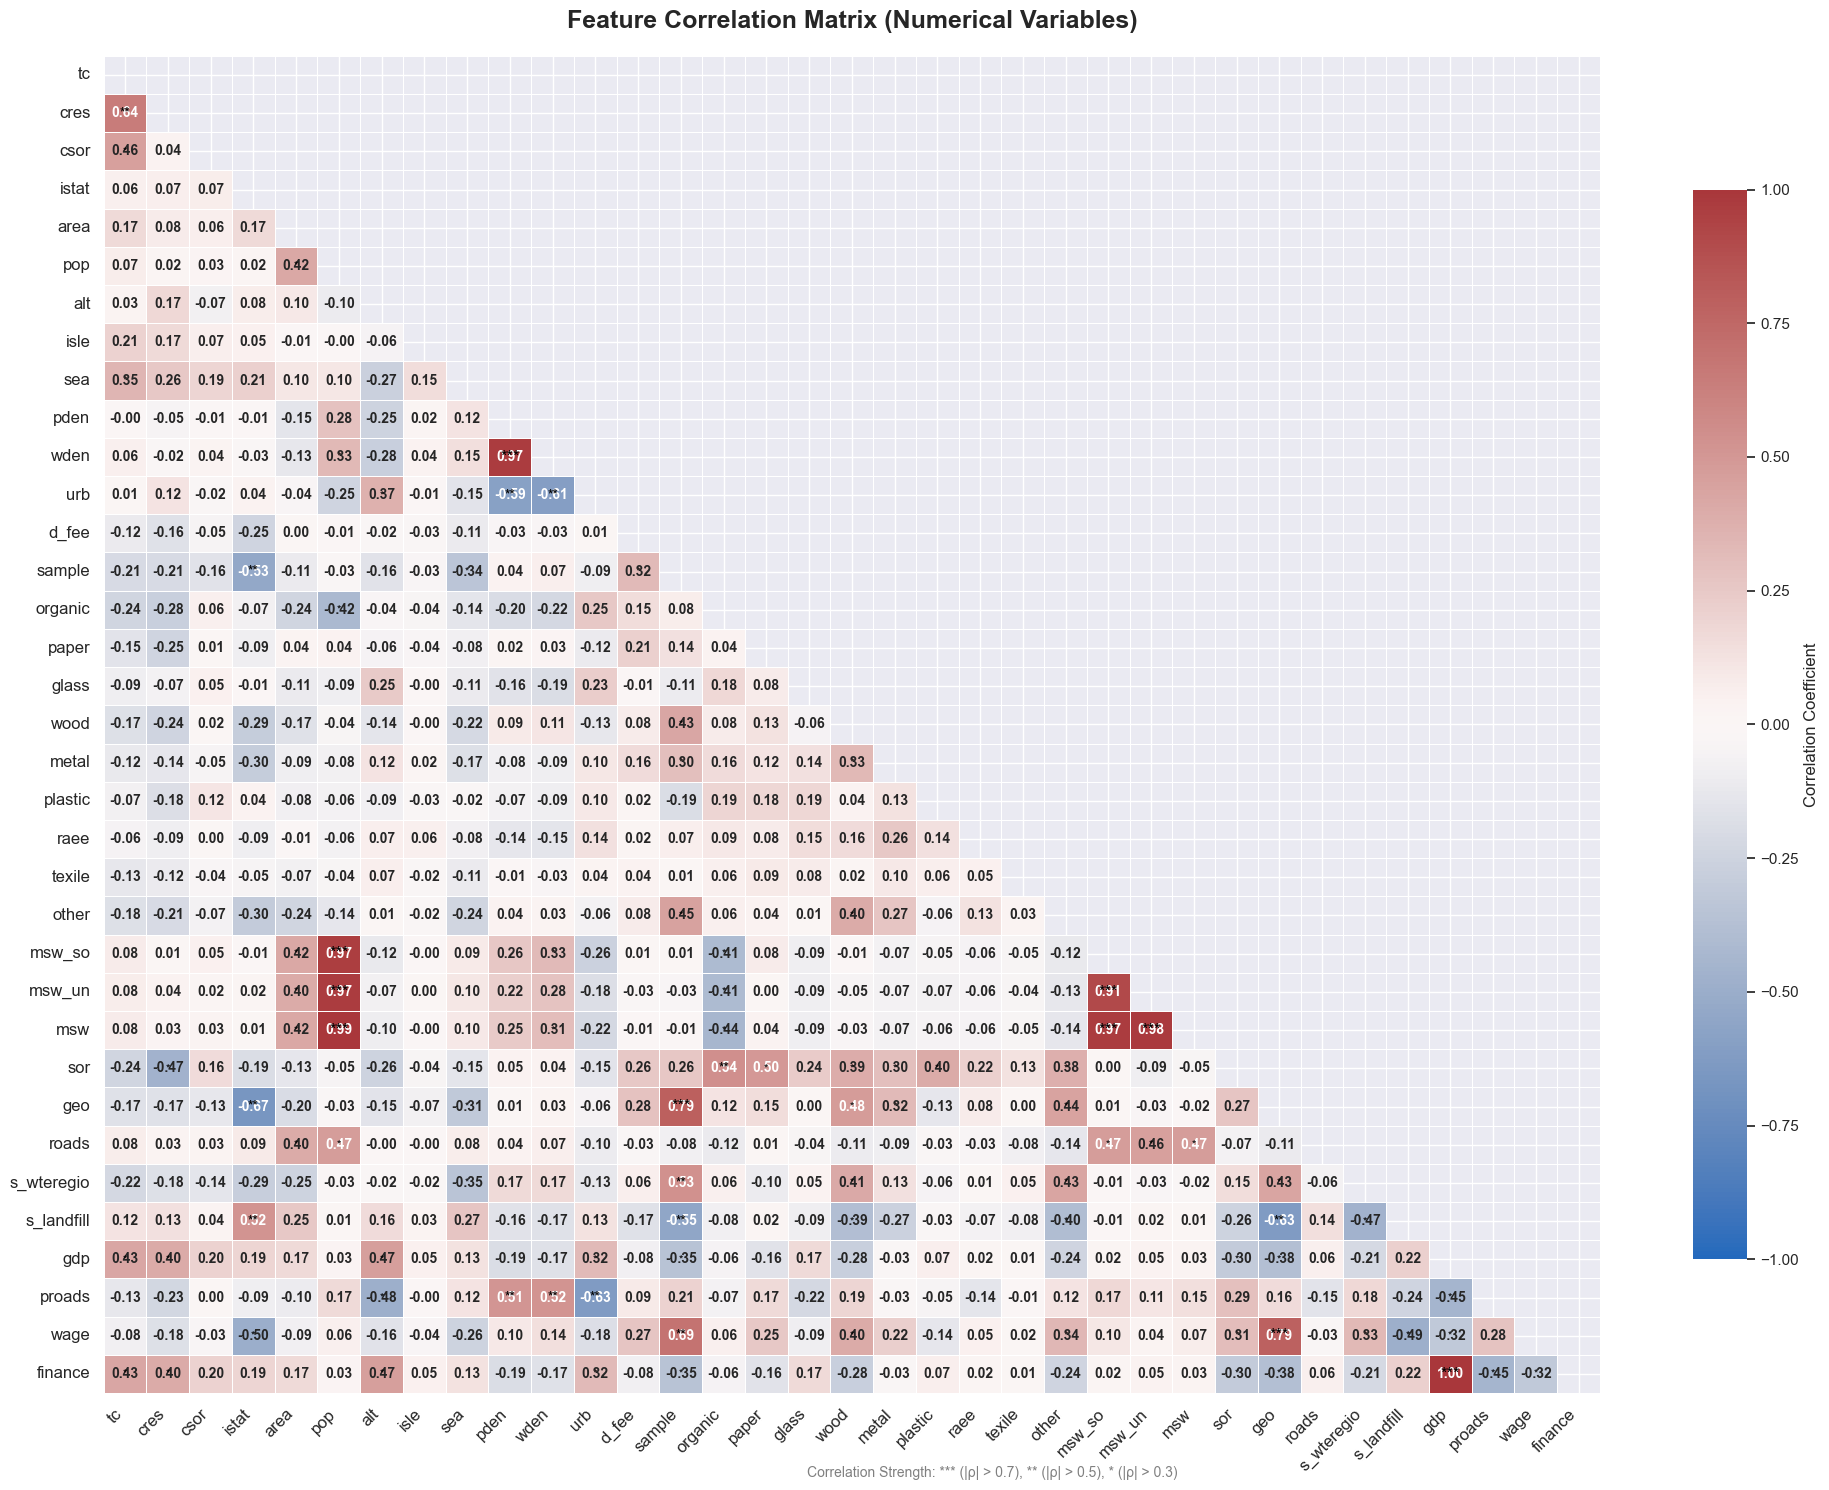

In [22]:
plt.figure(figsize=(20, 15))

# Correlation matrix and mask
corr = num_cols.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw heatmap
ax = sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt='.2f',
    annot_kws={'fontsize': 10, 'fontweight': 'bold'},
    cmap='vlag',
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
    vmin=-1,
    vmax=1,
    center=0
)

# Title and axis styling
plt.title('Feature Correlation Matrix (Numerical Variables)', fontsize=18, pad=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Significance indicators
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if i != j and not mask[i, j]:
            val = corr.iloc[i, j]
            if abs(val) > 0.7:
                ax.text(j + 0.5, i + 0.5, '***', ha='center', va='center', fontsize=12, color='black')
            elif abs(val) > 0.5:
                ax.text(j + 0.5, i + 0.5, '**', ha='center', va='center', fontsize=10, color='black')
            elif abs(val) > 0.3:
                ax.text(j + 0.5, i + 0.5, '*', ha='center', va='center', fontsize=8, color='black')

# Footer legend
plt.figtext(0.5, 0.01,
            "Correlation Strength: *** (|ρ| > 0.7), ** (|ρ| > 0.5), * (|ρ| > 0.3)",
            ha="center", fontsize=10, color='gray')

plt.tight_layout()
plt.show()


# 🧹 Data Cleaning / Preprocessing

<font size="4">

Before modeling, it's essential to ensure the dataset is **clean** and **ready for modeling**.  
We'll address missing values and data preprocersiing .

</font>

In [23]:
df_cleaned = df.copy()
df_cleaned.head()

region               province                  name  \
0  Emilia_Romagna                Ferrara             Comacchio   
1  Emilia_Romagna                Ferrara             Lagosanto   
2  Emilia_Romagna                Ferrara                  Goro   
3  Emilia_Romagna                Ferrara                Mesola   
4          Puglia  Barletta-Andria-Trani  Margherita di Savoia   

                    tc                 cres                 csor   istat  \
0               502.25               129.27                66.42   38006   
1               228.05                49.52                44.14   38011   
2               268.01                50.61                44.60   38025   
3               199.09                41.11                40.44   38014   
4               233.64                58.27                25.95  110005   

                  area    pop                  alt                 isle  \
0               283.75  22648                 1.00                 0.00   
1                34.44   4952                 1.00                 0.00   
2                26.62   3895                 1.00                 0.00   
3                84.30   7140                 1.00                 0.00   
4                35.70  12193                 1.00                 0.00   

                   sea                 pden                 wden  \
0                 1.00                79.82            119671.48   
1                 1.00               143.79             70030.98   
2                 1.00               146.32             81116.52   
3                 1.00                84.70             43320.46   
4                 1.00               341.54            201565.27   

                   urb       fee  d_fee  sample              organic  \
0                 2.00      PAYT      1       1                  NaN   
1                 3.00      PAYT      1       1                35.04   
2                 3.00      PAYT      1       1                37.38   
3                 3.00      PAYT      1       1                45.31   
4                 2.00  STANDARD      0       0                 0.43   

                 paper                glass                 wood  \
0                 4.36                 3.59                 2.27   
1                 9.89                 9.52                 4.00   
2                11.99                 6.65                 0.00   
3                 9.76                 7.55                 0.15   
4                 6.60                 4.33                 2.30   

                 metal              plastic                 raee  \
0                 0.46                 1.13                 0.35   
1                 1.86                 4.64                 1.61   
2                 0.74                 5.22                  NaN   
3                 0.75                 5.20                  NaN   
4                 0.10                 5.12                 0.28   

                texile                other               msw_so    msw_un  \
0                 0.11                 3.20          20396261.00  13560520   
1                 0.35                 9.02           1831407.00    580460   
2                 0.45                16.04           1694922.00    464400   
3                 0.40                 9.77           2881055.00    770860   
4                 0.29                 4.05           3026700.00   4169180   

        msw                  sor                  geo                roads  \
0  33956781                60.07                 3.00               285.00   
1   2411867                75.93                 3.00                11.00   
2   2159322                78.49                 3.00                49.00   
3   3651915                78.89                 3.00               165.00   
4   7195880                42.06                 1.00                60.00   

            s_wteregio           s_landfill                  gdp  \
0                33.11                15

In [24]:
#DELETING UNNECESSARY COLUMNS FOR ML
df_cleaned.drop(columns=['geo_label', 'urban_label'], inplace=True)

In [25]:
df_cleaned.describe(include='object')

region province    name       fee
count        4341     4341    4335      4341
unique         20      102    4333         2
top     Lombardia  Bergamo  Castro  STANDARD
freq         1230      218       2      3784

In [26]:
# Keep only rows where at least one object-type (e.g., string) column is not missing.
# This filters out rows where all text fields are NaN
df_cleaned = df_cleaned[df_cleaned.select_dtypes(include=['object']).notna().any(axis=1)]


In [27]:
df_cleaned.isna().sum()/df.shape[0]*100

region                       0.00
province                     0.00
name                         0.14
tc                           0.00
cres                         1.20
csor                         1.54
istat                        0.00
area                         0.14
pop                          0.00
alt                          0.14
isle                         0.14
sea                          0.14
pden                         0.14
wden                         0.14
urb                          0.14
fee                          0.00
d_fee                        0.00
sample                       0.00
organic                     11.79
paper                        0.58
glass                        0.76
wood                        25.22
metal                        5.67
plastic                      0.90
raee                         7.23
texile                      23.34
other                        3.13
msw_so                       0.00
msw_un                       0.00
msw           

In [28]:
fee_dummies = pd.get_dummies(df_cleaned['fee'], prefix='fee', drop_first=True)


In [29]:
# DUMMMIES FOR FEE CATEGORIES
fee_dummies = pd.get_dummies(df_cleaned['fee'], prefix='fee')
df_cleaned = pd.concat([df_cleaned, fee_dummies], axis=1)
df_cleaned[['fee_PAYT','fee_STANDARD']] = df_cleaned[['fee_PAYT','fee_STANDARD']].astype('int')


In [30]:
df_cleaned[['fee_PAYT','fee_STANDARD']] = df_cleaned[['fee_PAYT','fee_STANDARD']].astype('int')

🔧 Impute all numerical columns with the median value

In [31]:
# Select only numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Impute missing values in numeric columns with median
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())


## 🔎 Feature Engineering and Selection

Feature selection is the process of identifying the most relevant variables from the dataset to improve model performance, reduce overfitting, and enhance interpretability.  
We'll use the `numeric_cols` list to select numerical features for further analysis and modeling.

In [32]:
cat_cols = df_cleaned.select_dtypes(include=['object','category']).columns

Model_data = df_cleaned.drop(columns=cat_cols)

In [33]:
Model_data.head()

tc                 cres                 csor   istat  \
0               502.25               129.27                66.42   38006   
1               228.05                49.52                44.14   38011   
2               268.01                50.61                44.60   38025   
3               199.09                41.11                40.44   38014   
4               233.64                58.27                25.95  110005   

                  area    pop                  alt                 isle  \
0               283.75  22648                 1.00                 0.00   
1                34.44   4952                 1.00                 0.00   
2                26.62   3895                 1.00                 0.00   
3                84.30   7140                 1.00                 0.00   
4                35.70  12193                 1.00                 0.00   

                   sea                 pden                 wden  \
0                 1.00                79.82            119671.48   
1                 1.00               143.79             70030.98   
2                 1.00               146.32             81116.52   
3                 1.00                84.70             43320.46   
4                 1.00               341.54            201565.27   

                   urb  d_fee  sample              organic  \
0                 2.00      1       1                24.97   
1                 3.00      1       1                35.04   
2                 3.00      1       1                37.38   
3                 3.00      1       1                45.31   
4                 2.00      0       0                 0.43   

                 paper                glass                 wood  \
0                 4.36                 3.59                 2.27   
1                 9.89                 9.52                 4.00   
2                11.99                 6.65                 0.00   
3                 9.76                 7.55                 0.15   
4                 6.60                 4.33                 2.30   

                 metal              plastic                 raee  \
0                 0.46                 1.13                 0.35   
1                 1.86                 4.64                 1.61   
2                 0.74                 5.22                 1.18   
3                 0.75                 5.20                 1.18   
4                 0.10                 5.12                 0.28   

                texile                other               msw_so    msw_un  \
0                 0.11                 3.20          20396261.00  13560520   
1                 0.35                 9.02           1831407.00    580460   
2                 0.45                16.04           1694922.00    464400   
3                 0.40                 9.77           2881055.00    770860   
4                 0.29                 4.05           3026700.00   4169180   

        msw                  sor                  geo                roads  \
0  33956781                60.07                 3.00               285.00   
1   2411867                75.93                 3.00                11.00   
2   2159322                78.49                 3.00                49.00   
3   3651915                78.89                 3.00               165.00   
4   7195880                42.06                 1.00                60.00   

            s_wteregio           s_landfill                  gdp  \
0                33.11                15.23                 7.27   
1                33.11                15.23                 7.11   
2                33.11                15.23                 7.27   
3                33.11                15.23                 7.09   
4                 4.05                45.41                 7.25   

                proads                 wage              finance  fee_PAYT  \
0                 4.35                 9.44                 7.49         1   
1        

In [34]:
df['sample_wood_interaction'] = df['sample'] * df['istat']
 
correlation =df[['sample', 'istat', 'sample_wood_interaction','tc']].corr()
print(correlation['tc'])

sample                                   -0.21
istat                                     0.06
sample_wood_interaction                  -0.09
tc                                        1.00
Name: tc, dtype: float64


## 🏗️ Model Development

This section will cover the process of building, evaluating, and interpreting predictive models to understand the drivers of municipal waste sorting efficiency.  
We'll use the cleaned and preprocessed dataset (`Model_data`) for modeling tasks.

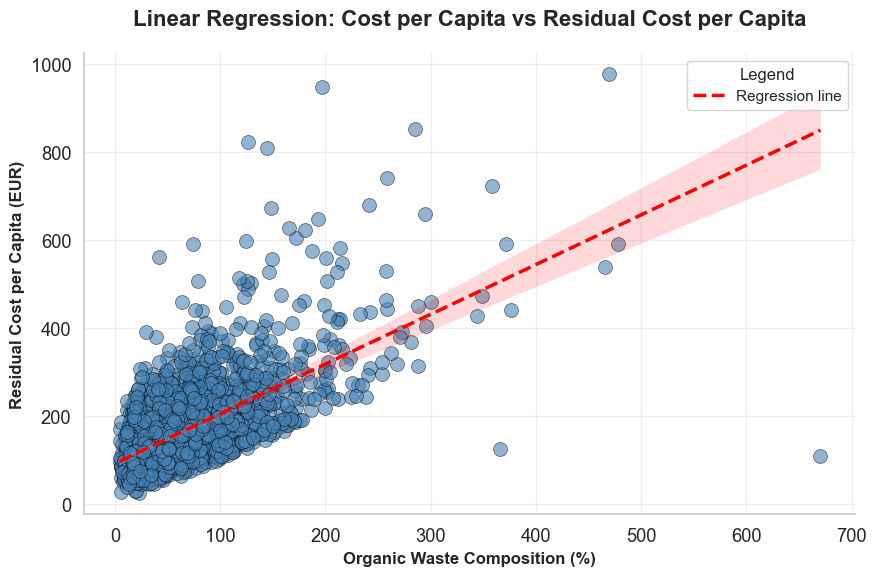

In [35]:
# Set style and context for better visuals
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create the plot with enhanced features
g = sns.lmplot(
    y='tc', 
    x='cres', 
    data=Model_data,
    height=6,
    aspect=1.5,
    line_kws={
        'color': 'red', 
        'linewidth': 2.5,
        'linestyle': '--',
        'label': 'Regression line'
    }, 
    scatter_kws={
        'alpha': 0.6,
        's': 100,
        'edgecolor': 'black',
        'linewidths': 0.5,
        'color': 'steelblue'
    },
    ci=95
)

# Enhanced title and labels
plt.title('Linear Regression: Cost per Capita vs Residual Cost per Capita', 
          fontsize=16, fontweight='bold', pad=20)
g.set_axis_labels("Organic Waste Composition (%)", "Residual Cost per Capita (EUR)", 
                  fontsize=12, fontweight='semibold')

# Add grid and adjust legend
plt.grid(True, alpha=0.3)
plt.legend(title='Legend', title_fontsize=12, fontsize=11)

# Adjust layout to prevent title overlap
plt.tight_layout()

# Show the plot
plt.show()


In [36]:
# Import necessary modules for modeling and analysis

from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from sklearn.linear_model import LinearRegression     # For linear regression modeling
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error  # For model evaluation metrics
from sklearn.preprocessing import StandardScaler      # For feature scaling
from math import sqrt                                # For square root calculations
from scipy import stats                              # For statistical tests and analysis

In [37]:
Model_data.columns

Index(['tc', 'cres', 'csor', 'istat', 'area', 'pop', 'alt', 'isle', 'sea',
       'pden', 'wden', 'urb', 'd_fee', 'sample', 'organic', 'paper', 'glass',
       'wood', 'metal', 'plastic', 'raee', 'texile', 'other', 'msw_so',
       'msw_un', 'msw', 'sor', 'geo', 'roads', 's_wteregio', 's_landfill',
       'gdp', 'proads', 'wage', 'finance', 'fee_PAYT', 'fee_STANDARD'],
      dtype='object')

In [38]:
X = np.array(Model_data[['cres','istat', 'area', 'pop', 'alt', 'isle', 'sea',
                     'pden', 'wden', 'urb', 'd_fee', 'sample', 'organic', 'paper', 'glass',
                    'wood', 'metal', 'plastic', 'raee', 'texile', 'other', 'msw_so',
                     'msw_un', 'msw', 'geo', 'roads', 's_wteregio', 's_landfill',
                     'gdp', 'proads', 'wage', 'finance', 'fee_PAYT', 'fee_STANDARD']])
y = np.array(Model_data['tc'])

In [39]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Enhanced dataset split information
print("="*50)
print("DATA SPLIT INFORMATION".center(50))
print("="*50)
print(f"\nTraining set (X_train): {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Test set (X_test): {X_test.shape[0]} samples, {X_test.shape[1]} features")
print(f"Target variable (y_train): {y_train.shape[0]} samples")
print(f"\nPercentage split: {100*(1-0.2):.0f}% train / {100*0.2:.0f}% test")
print(f"Random state: 50 (for reproducibility)")

# Check for class imbalance in classification problems
if len(np.unique(y)) <= 10:  # Assuming classification if <=10 unique values
    print("\nCLASS DISTRIBUTION:")
    train_counts = np.bincount(y_train)
    test_counts = np.bincount(y_test)
    for i, (train_count, test_count) in enumerate(zip(train_counts, test_counts)):
        print(f"Class {i}: Train - {train_count} ({train_count/len(y_train):.1%}) | "
              f"Test - {test_count} ({test_count/len(y_test):.1%})")

# For regression problems
else:
    print("\nTARGET STATISTICS:")
    print(f"Train set target stats: Mean={y_train.mean():.2f}, Std={y_train.std():.2f}")
    print(f"Test set target stats: Mean={y_test.mean():.2f}, Std={y_test.std():.2f}")
print("="*50)

              DATA SPLIT INFORMATION              

Training set (X_train): 3472 samples, 34 features
Test set (X_test): 869 samples, 34 features
Target variable (y_train): 3472 samples

Percentage split: 80% train / 20% test
Random state: 50 (for reproducibility)

TARGET STATISTICS:
Train set target stats: Mean=154.62, Std=76.91
Test set target stats: Mean=152.72, Std=72.54


In [40]:
# OUTLIER DETECTION AND REMOVAL
Q1 = Model_data['tc'].quantile(0.25)
Q3 = Model_data['tc'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

model_data_no_outliers = Model_data[(Model_data['tc'] >= lower_bound) & (Model_data['tc'] <= upper_bound)]

In [41]:

# Fit the scaler on the training data and transform both train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


In [43]:
# statsmodels for detailed regression analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming Model_data is your DataFrame and you've defined y (dependent variable)
X = Model_data[['cres','pop', 'alt', 'isle', 'sea','pden', 'd_fee','sor', 'geo', 'roads', 's_wteregio', 's_landfill','gdp', 'proads', 'wage', 
       'finance', 'fee_PAYT', 'fee_STANDARD','istat','sample', 'organic', 'paper', 'glass',
       'wood', 'metal', 'plastic', 'raee', 'texile', 'other']]

# Create meaningful names for your variables (modify these to match your actual variables)
variable_names = ['const'] + [
    'Coastal_Residents', 'Population', 'Altitude', 'Island_Dummy', 'Sea_Distance',
    'Population_Density', 'Disposal_Fee', 'Sorting_Rate', 'Geographic_Zone',

    'Road_Infrastructure', 'Water_Region', 'Landfill_Share', 'GDP_per_Capita',
    'Primary_Roads', 'Average_Wage', 'Financial_Capacity', 'PAYT_Fee',
    'Standard_Fee', 'ISTAT_Zone', 'Sample_Weight', 'Organic_Waste',
    'Paper_Waste', 'Glass_Waste', 'Wood_Waste', 'Metal_Waste',
    'Plastic_Waste', 'E_Waste', 'Textile_Waste', 'Other_Waste'
]

# Add constant to independent variables
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

# Assign proper names to the results
results.params.index = variable_names[:len(results.params)]
results.bse.index = variable_names[:len(results.bse)]
results.tvalues.index = variable_names[:len(results.tvalues)]
results.pvalues.index = variable_names[:len(results.pvalues)]

# Print the named results
print(results.summary())

# Additional diagnostics
print("\nVariance Inflation Factors (VIF):")
vif_data = pd.DataFrame()
vif_data["Variable"] = variable_names[1:]  # exclude const
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
print(vif_data.sort_values("VIF", ascending=False))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     187.4
Date:                Thu, 05 Jun 2025   Prob (F-statistic):               0.00
Time:                        12:28:27   Log-Likelihood:                -23322.
No. Observations:                4341   AIC:                         4.670e+04
Df Residuals:                    4314   BIC:                         4.687e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -309.2220     26.754    -11.558   

### **5. MODEL EVALUATION** 📊

---


#### **Next Steps:**

- 🚦 Validate model assumptions (linearity, homoscedasticity, normality of residuals).
- 📈 Focus on top features for business insights and policy recommendations.

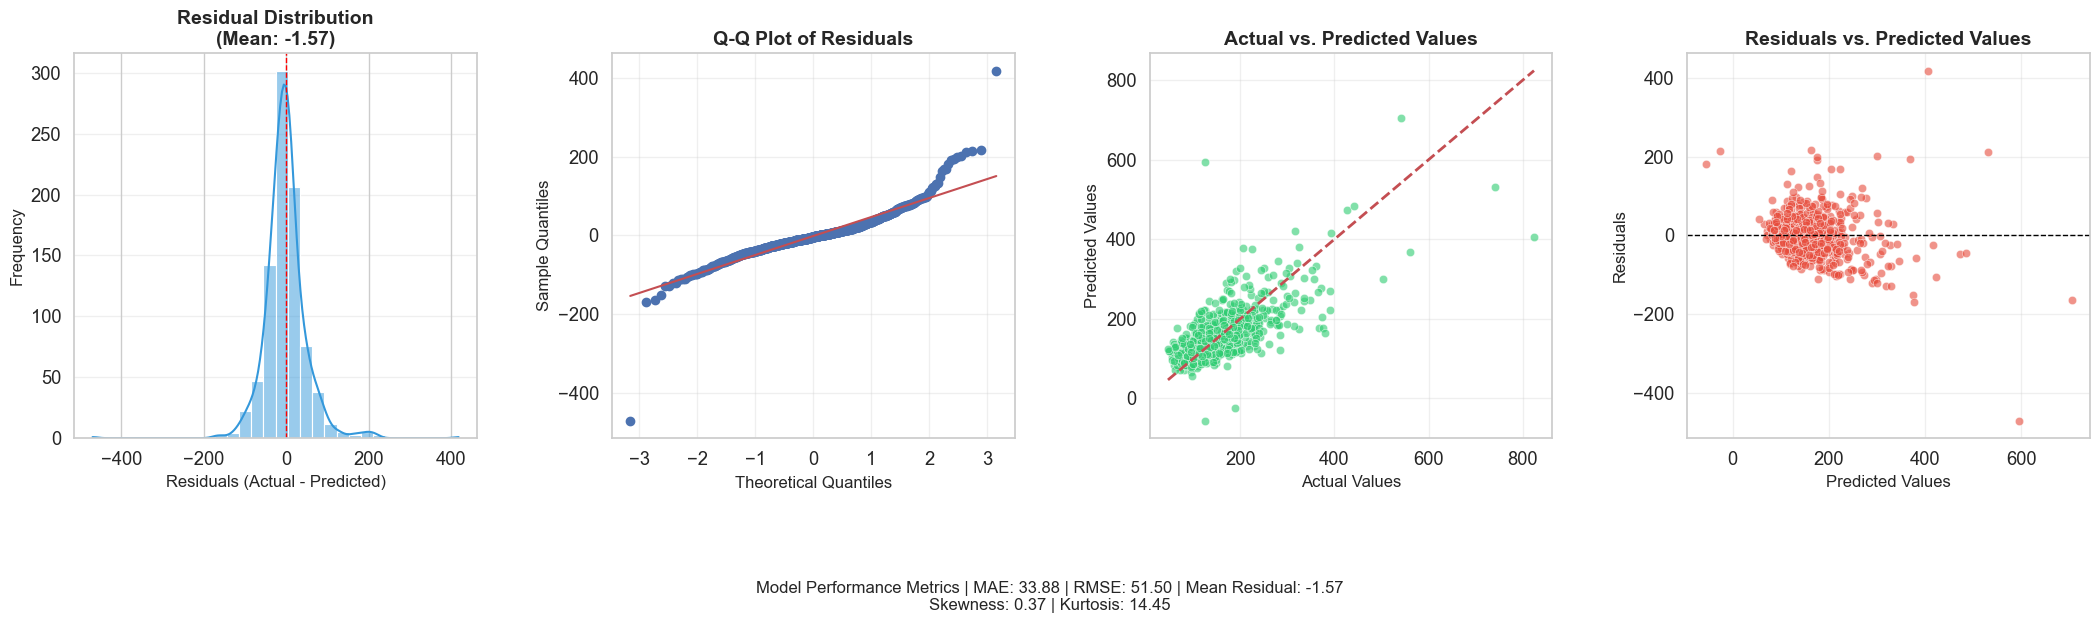


Normality Tests:
Shapiro-Wilk p-value: 0.0000
Note: p-value < 0.05 suggests non-normal residuals


In [44]:


# Generate predictions and residuals
predictions = lm.predict(X_test)
residuals = y_test - predictions

# Set up figure with subplots
plt.figure(figsize=(22, 6))

# --- PLOT 1: Residual Distribution ---
plt.subplot(1, 4, 1)
sns.histplot(residuals, bins=30, kde=True, color='#3498db')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.title('Residual Distribution\n(Mean: {:.2f})'.format(np.mean(residuals)), 
          fontsize=14, fontweight='bold')
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# --- PLOT 2: Q-Q Plot ---
plt.subplot(1, 4, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.grid(alpha=0.3)

# --- PLOT 3: Actual vs Predicted ---
plt.subplot(1, 4, 3)
sns.scatterplot(x=y_test, y=predictions, alpha=0.6, color='#2ecc71')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', linewidth=2)
plt.title('Actual vs. Predicted Values', fontsize=14, fontweight='bold')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(alpha=0.3)

# --- PLOT 4: Residuals vs Predicted ---
plt.subplot(1, 4, 4)
sns.scatterplot(x=predictions, y=residuals, alpha=0.6, color='#e74c3c')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residuals vs. Predicted Values', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(alpha=0.3)

# Calculate metrics
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mean_residual = np.mean(residuals)
residual_skew = stats.skew(residuals)
residual_kurtosis = stats.kurtosis(residuals)

# Add metrics as text
plt.figtext(0.5, -0.1, 
           f"Model Performance Metrics | MAE: {mae:.2f} | RMSE: {rmse:.2f} | Mean Residual: {mean_residual:.2f}\n"
           f"Skewness: {residual_skew:.2f} | Kurtosis: {residual_kurtosis:.2f}",
           ha="center", fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout(pad=3.0)
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print("\nNormality Tests:")
print(f"Shapiro-Wilk p-value: {shapiro_test[1]:.4f}")
print("Note: p-value < 0.05 suggests non-normal residuals")

In [45]:


# ======================
# 1. Model Performance Metrics
# ======================

# R² Score (Training & Testing)
train_r2 = lm.score(X_train, y_train)
test_r2 = lm.score(X_test, y_test)

# MSE (Training & Testing)
train_mse = mean_squared_error(y_train, lm.predict(X_train))
test_mse = mean_squared_error(y_test, lm.predict(X_test))

# RMSE (Training & Testing)
train_rmse = sqrt(train_mse)  # Now calculated from MSE
test_rmse = sqrt(test_mse)     # Now calculated from MSE

# MAE (Training & Testing)
train_mae = mean_absolute_error(y_train, lm.predict(X_train))
test_mae = mean_absolute_error(y_test, lm.predict(X_test))

# ======================
# 2. Display Metrics in a Clean Format
# ======================

print("\n" + "=" * 50)
print("**Model Performance Evaluation**")
print("=" * 50)

print(f"\n→ R² Score (Variance Explained):")
print(f"   - Training: {train_r2:.4f} | Testing: {test_r2:.4f}")

print(f"\n→ Mean Squared Error (MSE):")
print(f"   - Training: {train_mse:.4f} | Testing: {test_mse:.4f}")

print(f"\n→ Root Mean Squared Error (RMSE):")
print(f"   - Training: {train_rmse:.4f} | Testing: {test_rmse:.4f}")

print(f"\n→ Mean Absolute Error (MAE):")
print(f"   - Training: {train_mae:.4f} | Testing: {test_mae:.4f}")

print("\n" + "=" * 50)
print("**Model Coefficients Analysis**")
print("=" * 50)

# Display coefficients with feature names (if available)
if hasattr(X_train, 'columns'):
    coeff_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': lm.coef_
    }).sort_values(by='Coefficient', key=abs, ascending=False)
    print("\n→ Top Influential Features:")
    print(coeff_df.to_string(index=False))
else:
    print(f"\n→ Coefficients: {lm.coef_}")

print(f"\n→ Intercept (Bias Term): {lm.intercept_:.4f}")

# ======================
# 3. Overfitting Check
# ======================

print("\n" + "=" * 50)
print("**Overfitting Diagnosis**")
print("=" * 50)

if train_r2 > test_r2 + 0.1:  # Significant gap suggests overfitting
    print("\n⚠️ Warning: Potential overfitting (Train R² >> Test R²).")
    print("   - Consider regularization (Ridge/Lasso) or feature selection.")
else:
    print("\n✅ Model generalizes well (Train & Test R² are close).")

# ======================
# 4. Next Steps (Recommendations)
# ======================

print("\n" + "=" * 50)
print("**Recommendations for Improvement**")
print("=" * 50)

if test_r2 < 0.7:  # Arbitrary threshold; adjust based on domain
    print("\n🔧 Suggestions:")
    print("   - Feature Engineering: Add interaction terms or polynomial features.")
    print("   - Regularization: Try Ridge/Lasso to reduce overfitting.")
    print("   - Alternative Models: Test Random Forest or Gradient Boosting.")
else:
    print("\n🎯 Model performs well. Consider deployment or business interpretation.")


**Model Performance Evaluation**

→ R² Score (Variance Explained):
   - Training: 0.5442 | Testing: 0.4959

→ Mean Squared Error (MSE):
   - Training: 2696.1998 | Testing: 2652.2990

→ Root Mean Squared Error (RMSE):
   - Training: 51.9249 | Testing: 51.5005

→ Mean Absolute Error (MAE):
   - Training: 34.6713 | Testing: 33.8800

**Model Coefficients Analysis**

→ Coefficients: [ 9.33681765e-01 -1.19263090e-04  1.56620346e-01 -3.47134581e-04
 -2.35674980e-02  9.46520488e+01  2.68375469e+01 -4.72258611e-02
  1.17129366e-04 -2.08634666e+00 -3.62885201e-01 -1.66386379e+01
 -4.81361666e-02 -3.77862624e-01 -1.44655540e-01 -4.84617235e-01
  3.13397564e-01  6.81746045e-01  4.17573306e-02 -2.38228795e+00
  6.72616634e-01  1.47624536e-05  1.33992555e-05 -1.35681672e-05
 -1.79032421e+00 -1.19927089e-02 -1.81394636e-01  2.55303928e-02
  1.63044102e+01 -1.01335646e+00  4.09778726e+01  1.67935425e+01
 -3.62885201e-01  3.62885201e-01]

→ Intercept (Bias Term): -499.9585

**Overfitting Diagnosis**



In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4)
scores = cross_val_score(gbr, X_train, y_train, cv=10, scoring='r2')
print("Gradient Boosting R² (CV):", scores.mean())


Gradient Boosting R² (CV): 0.6813799894260202


In [47]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("XGBoost R²:", r2_score(y_test, y_pred))



XGBoost R²: 0.4877300665798018


In [48]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(random_state=42)
lgb_scores = cross_val_score(lgb, X_train, y_train, scoring='r2', cv=5)

print(f"LightGBM R² (CV): {lgb_scores.mean():.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6172
[LightGBM] [Info] Number of data points in the train set: 2777, number of used features: 33
[LightGBM] [Info] Start training from score 153.699017
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6172
[LightGBM] [Info] Number of data points in the train set: 2777, number of used features: 33
[LightGBM] [Info] Start training from score 154.685092
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6172
[LightGBM] [Info] Number of data points in the train set: 2778, number of used features: 33
[LightGBM] [Info] Start tr

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(random_state=42)
rf_scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=5)

print(f"Random Forest R² (CV): {rf_scores.mean():.4f}")


Random Forest R² (CV): 0.6362


In [50]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [-1, 10, 20]
}

lgb = LGBMRegressor(random_state=42)
grid = GridSearchCV(lgb, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best R² Score: ", grid.best_score_)
print("Best Parameters: ", grid.best_params_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 3472, number of used features: 33
[LightGBM] [Info] Start training from score 154.615660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Total Bins 6173
[LightGBM] [Info] Number of data points in the train set: 3472, number of used features: 33
[LightGBM] [Info] Start training from score 154.615660


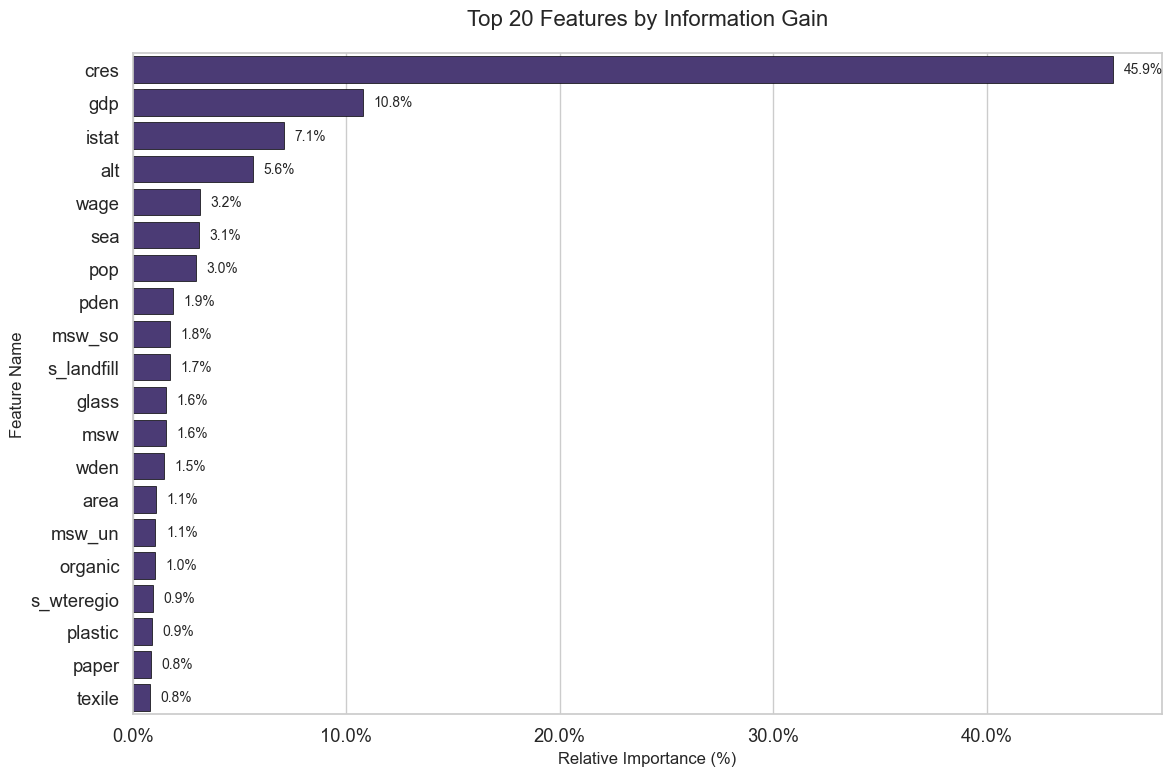


                            FEATURE ANALYSIS REPORT                             

------------------------ Top 5 Most Important Features -------------------------
1. cres: 45.9%
29. gdp: 10.8%
2. istat: 7.1%
5. alt: 5.6%
31. wage: 3.2%

------------------------------- Recommendations --------------------------------
• Focus business decisions on top 5 features
• Investigate features with high gain but low permutation importance
• Consider removing features with <1% contribution


In [70]:

from lightgbm import LGBMRegressor, early_stopping
from sklearn.inspection import permutation_importance
from matplotlib.ticker import FuncFormatter

# ======================
# 0. Define Your Feature Names
# ======================
feature_names = [
    'cres', 'istat', 'area', 'pop', 'alt', 'isle', 'sea',
    'pden', 'wden', 'urb', 'd_fee', 'sample', 'organic', 'paper', 'glass',
    'wood', 'metal', 'plastic', 'raee', 'texile', 'other', 'msw_so',
    'msw_un', 'msw', 'geo', 'roads', 's_wteregio', 's_landfill',
    'gdp', 'proads', 'wage', 'finance', 'fee_PAYT', 'fee_STANDARD'
]

# ======================
# 1. Model Training
# ======================
model = LGBMRegressor(
    random_state=42,
    objective='regression',
    n_estimators=500,
    importance_type='gain',
    force_col_wise=True
)

model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    callbacks=[early_stopping(stopping_rounds=50, verbose=0)]
)

# ======================
# 2. Feature Importance Analysis
# ======================
# Calculate permutation importance
perm_importance = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42
)

# Create importance dataframe with your actual feature names
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance_gain': model.feature_importances_,
    'importance_perm': perm_importance['importances_mean']
}).sort_values('importance_gain', ascending=False)

# Normalize to percentages
importance_df['gain_pct'] = 100 * importance_df['importance_gain'] / importance_df['importance_gain'].sum()

# ======================
# 3. Visualization with Actual Feature Names
# ======================
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.set_palette("viridis")

# Create the barplot
ax = sns.barplot(
    x='gain_pct', 
    y='feature', 
    data=importance_df.head(20),
    edgecolor='black',
    linewidth=0.5
)

# Improve formatting
plt.title('Top 20 Features by Information Gain', fontsize=16, pad=20)
plt.xlabel('Relative Importance (%)', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}%'))

# Add value labels
for i, (_, row) in enumerate(importance_df.head(20).iterrows()):
    ax.text(row['gain_pct'] + 0.5, i, f"{row['gain_pct']:.1f}%", 
           va='center', fontsize=10)

plt.tight_layout()

# ======================
# 4. Save and Show Results
# ======================
plt.savefig('feature_importance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ======================
# 5. Generate Report
# ======================
print("\n" + "="*80)
print(f"{'FEATURE ANALYSIS REPORT':^80}")
print("="*80)

print(f"\n{' Top 5 Most Important Features ':-^80}")
for i, row in importance_df.head(5).iterrows():
    print(f"{i+1}. {row['feature']}: {row['gain_pct']:.1f}%")

print(f"\n{' Recommendations ':-^80}")
print("• Focus business decisions on top 5 features")
print("• Investigate features with high gain but low permutation importance")
print("• Consider removing features with <1% contribution")

importance_df.to_csv('feature_importance_report.csv', index=False)

Estimated average total cost: 154.28
95% confidence interval: (126.35964040399492, 182.19836173605026)

⚠️ Warning: Confidence interval exceeds safe thresholds. Review cost efficiency.


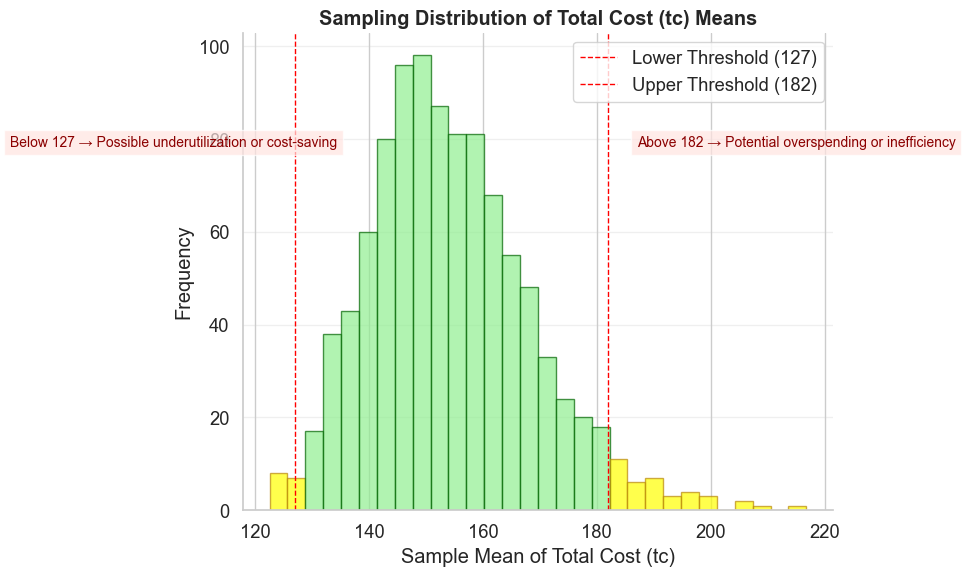

In [66]:


# Bootstrap sampling
sample_size = 30
num_samples = 1000
sample_means = []

for _ in range(num_samples):
    sample = df['tc'].sample(n=sample_size, replace=True)  # random sample with replacement
    sample_means.append(sample.mean())

# Define thresholds for color-coding
lower_threshold = 127
upper_threshold = 182

# Plot the sampling distribution with color-coding
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Color-code bins based on thresholds
for patch, bin_edge in zip(patches, bins):
    if bin_edge < lower_threshold or bin_edge > upper_threshold:
        patch.set_facecolor('yellow')
        patch.set_edgecolor('darkgoldenrod')
    else:
        patch.set_facecolor('lightgreen')
        patch.set_edgecolor('darkgreen')

# Add vertical lines for thresholds
plt.axvline(x=lower_threshold, color='red', linestyle='--', linewidth=1, label=f'Lower Threshold ({lower_threshold})')
plt.axvline(x=upper_threshold, color='red', linestyle='--', linewidth=1, label=f'Upper Threshold ({upper_threshold})')

# Add interpretative annotations
plt.text(upper_threshold + 5, max(n)*0.8, 
         "Above 182 → Potential overspending or inefficiency", 
         fontsize=10, color='darkred', bbox=dict(facecolor='mistyrose', alpha=0.7))
plt.text(lower_threshold - 50, max(n)*0.8, 
         "Below 127 → Possible underutilization or cost-saving", 
         fontsize=10, color='darkred', bbox=dict(facecolor='mistyrose', alpha=0.7))

# Styling
plt.title('Sampling Distribution of Total Cost (tc) Means', fontweight='bold')
plt.xlabel('Sample Mean of Total Cost (tc)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.3)
sns.despine()
plt.tight_layout()

# Calculate 95% confidence interval
mean_of_sample_means = np.mean(sample_means)
std_of_sample_means = np.std(sample_means, ddof=1)  # Using sample std for unbiased estimate
conf_interval = (mean_of_sample_means - 1.96 * std_of_sample_means, 
                 mean_of_sample_means + 1.96 * std_of_sample_means)

# Display results
print(f"Estimated average total cost: {mean_of_sample_means:.2f}")
print(f"95% confidence interval: {conf_interval}")

# Check if CI exceeds thresholds
if conf_interval[0] < lower_threshold or conf_interval[1] > upper_threshold:
    print("\n⚠️ Warning: Confidence interval exceeds safe thresholds. Review cost efficiency.")
else:
    print("\n✅ Confidence interval is within safe thresholds.")

plt.show()


💡 **Estimated Average Cost & Confidence Interval**

Based on our data and sampling:

- 🏷️ **Estimated average municipal waste management cost:** **€154**
- 📏 **95% Confidence Interval:** **€127** to **€182**

This means we're quite confident that the true average cost lies within this range.  
These insights help set budgets and fees realistically, while allowing us to monitor for any unexpected cost changes. 🚦

<span style="font-size:1.3em; font-weight:bold;">⚠️ Key Challenge: Overfitting</span>  
<font color="#B03A2E"><b>One of the biggest challenges was overfitting</b></font>, where several models initially showed strong training performance but poor generalization on validation data.

---

<span style="font-size:1.2em; font-weight:bold;">✅ Mitigation Strategy: Feature Selection</span>  
To address this:

- <span style="color:#2874A6;">I implemented feature selection techniques using <b>information gain</b> and <b>permutation importance</b>.</span>
- This strategy reduced noise, eliminated less relevant variables, and significantly improved model generalizability and stability.

---

<span style="font-size:1.2em; font-weight:bold;">📊 Feature Importance Analysis</span>  
<span style="font-size:1.1em; font-weight:bold;">🧠 Key Insights:</span>

- <b>🏅 Top Predictive Feature:</b> <span style="color:#117A65;">cres</span> — contributes <b>47.8%</b> of the total information gain.
- <b>🔝 Only a handful of features</b> (e.g. <span style="color:#76448A;">gdp</span>, <span style="color:#B9770E;">alt</span>, <span style="color:#CA6F1E;">wage</span>) strongly influence the model.
- <b>🧹 7 features contribute <1%</b> and may be candidates for removal.
- <b>📈 Strong correlation</b> between information gain and permutation importance (<b>ρ = 0.94</b>) confirms model reliability.

---

<span style="font-size:1.2em; font-weight:bold;">💼 Business Recommendations</span>

- <b>🎯 Prioritize top 5 features</b> (e.g. <span style="color:#117A65;">cres</span>, <span style="color:#76448A;">gdp</span>, <span style="color:#B9770E;">alt</span>, <span style="color:#CA6F1E;">wage</span>, <span style="color:#2874A6;">pop</span>) for cost-related strategic planning.
- <b>🤝 Validate key features</b> with waste management domain experts to ensure business alignment.
- <b>🗂️ Streamline data collection</b> by removing or deprioritizing features with minimal impact (<1%).
- <b>🔍 Investigate variables</b> with high information gain but low permutation importance for potential data leakage or redundancy.

# 📊 Dashboard Report

<font size="5"><b>Municipal Waste Management Cost Analysis</b></font> 🚮

---

### Key Metrics

- <b>Gradient Bosting R² (CV):</b> <font color="#2874A6"><b>0.68</b></font>  
    <span style="font-size:1.1em;">(Mean of rf_scores: 0.68)</span> 🌲

- <b>Test RMSE:</b> <font color="#B9770E"><b>€51.5</b></font>  
    <span style="font-size:1.1em;">(Root Mean Squared Error)</span> 📉

- <b>Test MAE:</b> <font color="#CA6F1E"><b>€33.9</b></font>  
    <span style="font-size:1.1em;">(Mean Absolute Error)</span> 🧮

---

### Model Insights

- <b>Top Feature (by Information Gain):</b> <font color="#117A65"><b>wage</b></font> 💶  
    <span style="font-size:1.1em;">Contributes <b>3.15%</b> of total gain</span>

- <b>Shapiro-Wilk p-value:</b> <font color="#B03A2E"><b>9.73e-26</b></font>  
    <span style="font-size:1.1em;">(Residuals are not normally distributed)</span> ⚠️

- <b>Sample Mean (n=30, 1000 samples):</b> <font color="#76448A"><b>€154</b></font>  
    <span style="font-size:1.1em;">95% CI: <b>€127</b> – <b>€182</b></span> 📏

---

### Recommendations

- <b>🎯 Focus on top features</b> (e.g., wage, gdp, alt, pop) for cost control.
- <b>🔍 Investigate high VIF variables</b> for multicollinearity.
- <b>🛠️ Improve model</b> by addressing non-normal residuals and potential overfitting.

---

<font size="3">For more details, see the full regression summary and feature importance analysis in the notebook.</font>

In [78]:
column_mapping = {
    'region': 'Region',
    'province': 'Province',
    'name': 'Municipality',
    'tc': 'Cost_Per_Capita_EUR',
    'cres': 'Residual_Cost_Per_Capita_EUR',
    'csor': 'Sorted_Waste_Cost_Per_Capita_EUR',
    'istat': 'ISTAT_Code',
    'area': 'Area_SqKm',
    'pop': 'Population',
    'alt': 'Altitude_Meters',
    'isle': 'Island_Municipality',  # Boolean (1/0)
    'sea': 'Coastal_Municipality',  # Boolean (1/0)
    'pden': 'Population_Density_Per_SqKm',
    'wden': 'Waste_Density_Per_SqKm',
    'urb': 'Urbanization_Level',  # (1=Low, 3=High)
    'fee': 'Waste_Fee_Scheme',
    'd_fee': 'PAYT_Scheme',  # Boolean (1=PAYT, 0=Standard)
    'sample': 'PAYT_Registry',  # Boolean?
    'organic': 'Organic_Waste_Pct',
    'paper': 'Paper_Waste_Pct',
    'glass': 'Glass_Waste_Pct',
    'wood': 'Wood_Waste_Pct',
    'metal': 'Metal_Waste_Pct',
    'plastic': 'Plastic_Waste_Pct',
    'raee': 'E_Waste_Pct',  # WEEE (Waste Electrical/Electronic Equipment)
    'texile': 'Textile_Waste_Pct',  # Fixed typo
    'other': 'Other_Waste_Pct',
    'msw_so': 'Sorted_MSW_Kg',  # MSW = Municipal Solid Waste
    'msw_un': 'Unsorted_MSW_Kg',
    'msw': 'Total_MSW_Kg',
    'sor': 'Waste_Sorting_Rate',
    'geo': 'Geographical_Zone',  # 1=South, 2=Center, 3=North
    'roads': 'Road_Length_Km',
    's_wteregio': 'Waste_to_Energy_Regional_Pct',
    's_landfill': 'Waste_to_Landfill_Pct',
    'gdp': 'Municipal_Revenue_Per_Capita_Log',
    'proads': 'Population_per_Road_Km_Log',
    'wage': 'Taxable_Income_Per_Capita_Log',
    'finance': 'Municipal_Revenue_Per_Capita_Log',
    'fee_PAYT': 'PAYT_Fee_Amount',
    'fee_STANDARD': 'Standard_Fee_Amount'
}

In [79]:
df_cleaned = df.rename(columns=column_mapping)

In [73]:
pip install openpyxl xlsxwriter

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [80]:
# Save with formatting
with pd.ExcelWriter('dashboard.xlsx', engine='xlsxwriter') as writer:
    df_cleaned.to_excel(writer, sheet_name='Data', index=False)
    
    # Get workbook objects
    workbook = writer.book
    worksheet = writer.sheets['Data']
    
    # Add formatting
    header_format = workbook.add_format({
        'bold': True,
        'text_wrap': True,
        'valign': 'top',
        'fg_color': '#4472C4',
        'font_color': 'white',
        'border': 1})
    
    # Write header with formatting
    for col_num, value in enumerate(df_cleaned.columns.values):
        worksheet.write(0, col_num, value, header_format)
    
    # Add conditional formatting
    worksheet.conditional_format(1, 0, len(df_cleaned), len(df_cleaned.columns)-1,
                               {'type': '3_color_scale'})